In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suicide-dataset-nivethitha-maam/suicide_master sheet_Jan01_2024.xlsx
/kaggle/input/statewise-suicide-2022/india_heatmap.xlsx
/kaggle/input/shp-file-india/India_State_Boundary.shp


# reading data set

In [2]:
ds = pd.read_excel('/kaggle/input/suicide-dataset-nivethitha-maam/suicide_master sheet_Jan01_2024.xlsx')

In [3]:
ds.shape

(59, 30)

In [4]:
ds.head()

Year  18_male  18_female  18_total  30_male  30_female  30_total  45_male  \
0  1964      NaN        NaN       NaN      NaN        NaN       NaN      NaN   
1  1965      NaN        NaN       NaN      NaN        NaN       NaN      NaN   
2  1966      NaN        NaN       NaN      NaN        NaN       NaN      NaN   
3  1967      NaN        NaN       NaN      NaN        NaN       NaN      NaN   
4  1968      NaN        NaN       NaN      NaN        NaN       NaN      NaN   

   45_female  45_total  ...  Suicide_rate  Infertility  In_male  In_female  \
0        NaN       NaN  ...      7.075968          NaN      NaN        NaN   
1        NaN       NaN  ...      6.298829          NaN      NaN        NaN   
2        NaN       NaN  ...      7.589332          NaN      NaN        NaN   
3        NaN       NaN  ...      7.507530          NaN      NaN        NaN   
4        NaN       NaN  ...      7.772302          NaN      NaN        NaN   

   Illness  Il_male  Il_female  Addiction  A_male  A_female  
0      NaN      NaN        NaN        NaN     NaN       NaN  
1      NaN      NaN        NaN        NaN     NaN       NaN  
2      NaN      NaN        NaN        NaN     NaN       NaN  
3      NaN      NaN        NaN        NaN     NaN       NaN  
4      NaN      NaN        NaN        NaN     NaN       NaN  

[5 rows x 30 columns]

In [5]:
fig1 = ds[['Year','Suicide_rate']]

In [6]:
fig1.head()

Year  Suicide_rate
0  1964      7.075968
1  1965      6.298829
2  1966      7.589332
3  1967      7.507530
4  1968      7.772302

In [7]:
max(fig1['Year']),min(fig1['Year'])

(2022, 1964)

In [8]:
import matplotlib.pyplot as plt

# trend line of complete dataset suicide rate 

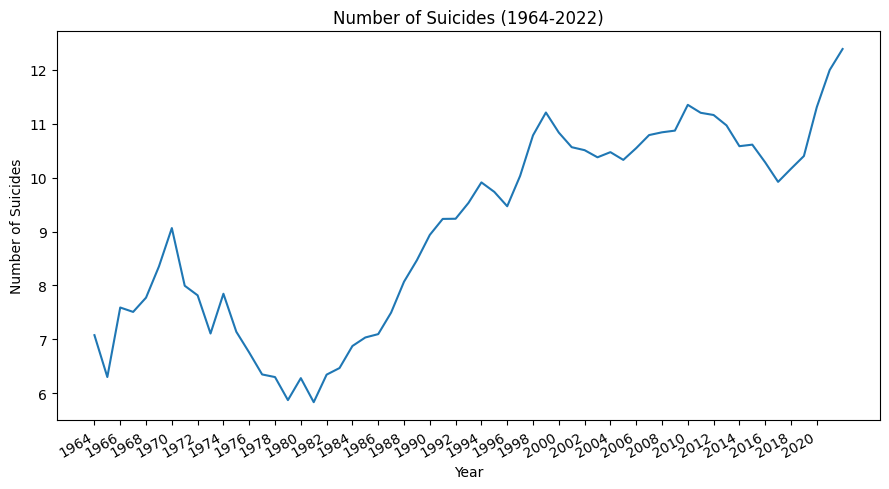

In [9]:
fig,ax = plt.subplots(figsize=(9,5))

ax.plot(fig1['Year'], fig1['Suicide_rate'])

ax.set_xlabel('Year')
ax.set_ylabel('Number of Suicides')
ax.set_title('Number of Suicides (1964-2022)')

ax.set_xticks(range(1964,2022,2))

fig.autofmt_xdate()
plt.tight_layout()

In [10]:
ds['Year'] = pd.to_datetime(ds['Year'], format='%Y')

In [11]:
# Filter the DataFrame for the years 1995 to 2022
#filtered_ds = ds[(ds['Year'].dt.year >= 1995) & (ds['Year'].dt.year <= 2022)]

In [12]:
# Sum the values in the 'Infertility' column for the filtered data
#ts_infertility = filtered_ds['A_female'].sum()

#print(f"Total Infertility from 1995 to 2022: {ts_infertility}")

In [13]:
#from scipy.stats import chi2_contingency

In [14]:
'''
# Filter the data for the years 1995 to 2002
filtered_df = ds[(ds['Year'].dt.year >= 1995) & (ds['Year'].dt.year <= 2002)]

# Sum the values for each category and gender
infertility_male = filtered_df['In_male'].sum()
infertility_female = filtered_df['In_female'].sum()
illness_male = filtered_df['Il_male'].sum()
illness_female = filtered_df['Il_female'].sum()
addiction_male = filtered_df['A_male'].sum()
addiction_female = filtered_df['A_female'].sum()

# Create contingency tables
infertility_table = [[infertility_male, infertility_female]]
illness_table = [[illness_male, illness_female]]
addiction_table = [[addiction_male, addiction_female]]

# Perform chi-square tests
_, p_value_infertility, _, _ = chi2_contingency(infertility_table)
_, p_value_illness, _, _ = chi2_contingency(illness_table)
_, p_value_addiction, _, _ = chi2_contingency(addiction_table)

# Display the results
results = {
    'Category': ['Infertility', 'Illness', 'Drug Addiction'],
    'P-Value': [p_value_infertility, p_value_illness, p_value_addiction]
}
results_df = pd.DataFrame(results)
print(results_df)
'''

"\n# Filter the data for the years 1995 to 2002\nfiltered_df = ds[(ds['Year'].dt.year >= 1995) & (ds['Year'].dt.year <= 2002)]\n\n# Sum the values for each category and gender\ninfertility_male = filtered_df['In_male'].sum()\ninfertility_female = filtered_df['In_female'].sum()\nillness_male = filtered_df['Il_male'].sum()\nillness_female = filtered_df['Il_female'].sum()\naddiction_male = filtered_df['A_male'].sum()\naddiction_female = filtered_df['A_female'].sum()\n\n# Create contingency tables\ninfertility_table = [[infertility_male, infertility_female]]\nillness_table = [[illness_male, illness_female]]\naddiction_table = [[addiction_male, addiction_female]]\n\n# Perform chi-square tests\n_, p_value_infertility, _, _ = chi2_contingency(infertility_table)\n_, p_value_illness, _, _ = chi2_contingency(illness_table)\n_, p_value_addiction, _, _ = chi2_contingency(addiction_table)\n\n# Display the results\nresults = {\n    'Category': ['Infertility', 'Illness', 'Drug Addiction'],\n    'P-Va

# creating new ds to predict the suicide rate using arima model 

In [15]:
new_ds = ds.copy()

In [16]:
new_ds = ds[['Year','Suicide_rate']]

In [17]:
new_ds.head()

Year  Suicide_rate
0 1964-01-01      7.075968
1 1965-01-01      6.298829
2 1966-01-01      7.589332
3 1967-01-01      7.507530
4 1968-01-01      7.772302

## converting the year col to date time format using padndas and setting index as year

In [18]:
new_ds.index = pd.to_datetime(new_ds.Year)

In [19]:
new_ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 1964-01-01 to 2022-01-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Year          59 non-null     datetime64[ns]
 1   Suicide_rate  59 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


# preprocessing new_ds

In [20]:
new_ds.drop('Year',axis=1,inplace = True)

/tmp/ipykernel_18/1319477296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ds.drop('Year',axis=1,inplace = True)


In [21]:
new_ds.head()

Suicide_rate
Year                    
1964-01-01      7.075968
1965-01-01      6.298829
1966-01-01      7.589332
1967-01-01      7.507530
1968-01-01      7.772302

In [22]:
new_ds.duplicated().sum()

0

In [23]:
new_ds.isnull().sum()

Suicide_rate    0
dtype: int64

In [24]:
new_ds.describe()

Suicide_rate
count     59.000000
mean       9.039905
std        1.841179
min        5.831764
25%        7.317040
50%        9.468934
75%       10.574540
max       12.388041

# checking statioratiy of data

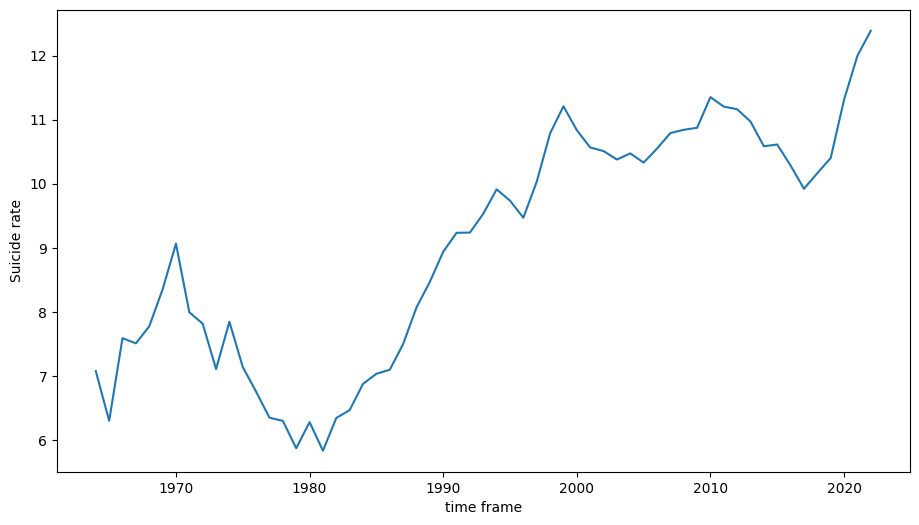

In [25]:
plt.figure(figsize=(11,6))

f = plt.figure(1)
ax1 = f.add_subplot(111)
ax1.set_xlabel('time frame')
ax1.set_ylabel('Suicide rate')
ax1.plot(new_ds)
plt.show()

## here we can observe that visually the data is not stationery sice we can observe an upward trend
### so we will perform the adfuller test to confirm the stationarity of the data

In [26]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller

# performing ad fuller test to check stationarity

In [27]:
result = adfuller(new_ds)
print("adf statistic : ",result[0])
print("p value : ",result[1])
print("critical values : ",result[4])

adf statistic :  -0.6633786395292045
p value :  0.8560086730699513
critical values :  {'1%': -3.5506699942762414, '5%': -2.913766394626147, '10%': -2.5946240473991997}


### here we can see that the p-value > 0.05 so we can conclude that the data is not stationary
#### so we will apply  log transformation on the data to make it stationary

## applying log transformation

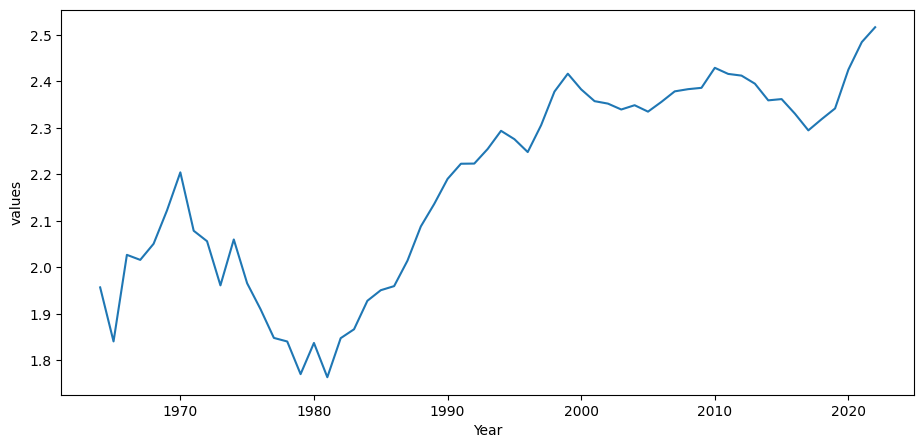

In [28]:
plt.figure(figsize=(11,5))
fig = plt.figure(1)
ds_log = np.log(new_ds)
plt.plot(ds_log)
plt.xlabel('Year')
plt.ylabel('values')
plt.show()

### even after performing log transformation we can see that the data is still not stationary so now we will perform differencing operation

## performing differencing operation

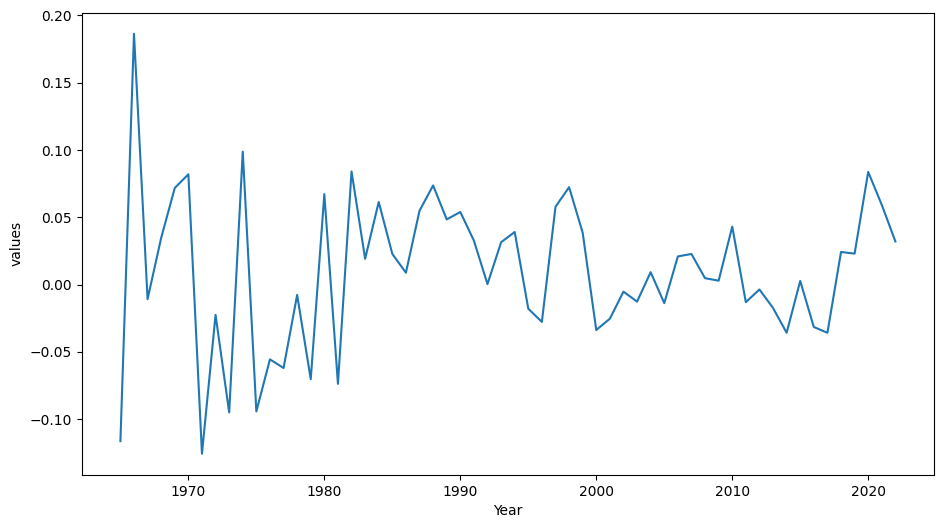

In [29]:
plt.figure(figsize=(11,6))
fig = plt.figure(1)

ds_log_diff = ds_log - ds_log.shift()
plt.plot(ds_log_diff)
plt.xlabel('Year')
plt.ylabel('values')
plt.show()

### after performing the differencing operation we can see that the data is now almost stationary since the overall trends are not there

### to confirm this statistacally we will use the rolling mean method

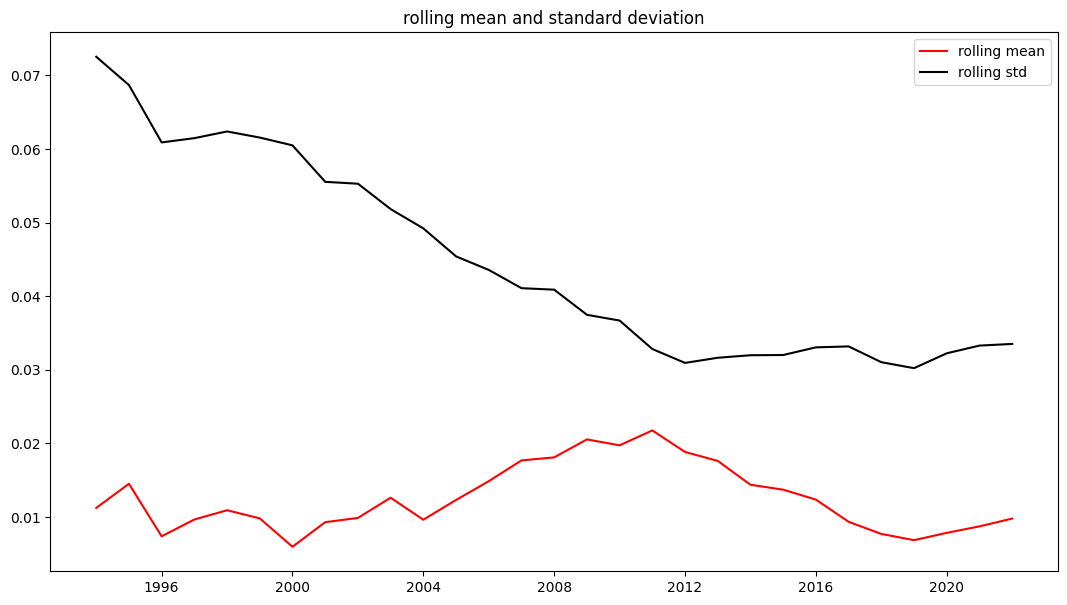

In [30]:
rollmean = ds_log_diff.rolling(30).mean() 
rollstd = ds_log_diff.rolling(30).std()

plt.figure(figsize=(13,7))
mean = plt.plot(rollmean,label = 'rolling mean',color='red')
std = plt.plot(rollstd , label='rolling std',color='black')
plt.legend(loc='best')
plt.title('rolling mean and standard deviation')
plt.show(block=False)

In [31]:
ds_log_diff.isnull().sum()

Suicide_rate    1
dtype: int64

In [32]:
ds_log_diff.dropna(inplace=True)

## adfuller test to confirm stationarity

In [33]:
result2 = adfuller(ds_log_diff)
print("adf statistic : ",result2[0])
print("p value : ",result2[1])
print("critical values : ",result2[4])

adf statistic :  -3.9622578739213297
p value :  0.0016215586298753608
critical values :  {'1%': -3.552928203580539, '5%': -2.9147306250000002, '10%': -2.595137155612245}


# model creation

In [34]:
new_ds.sort_index(inplace = True)

In [35]:
log_acf = acf(ds_log_diff,nlags=8)
log_pacf = pacf(ds_log_diff,nlags=8)

# deciding AR and MA terms using the ACF and PACF graph

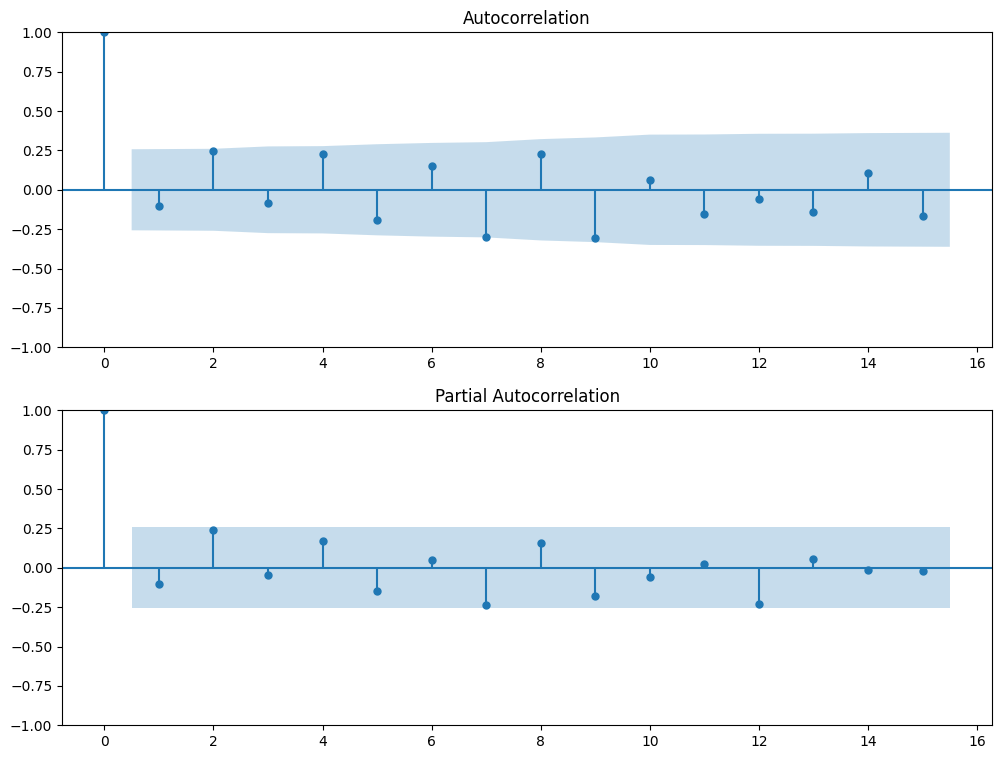

In [36]:
# selecting the ar and ma terms

import statsmodels.api as sm

fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ds_log_diff.dropna(),lags=15,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ds_log_diff.dropna(),lags=15,ax=ax2)

In [37]:
from statsmodels.tsa.arima.model import ARIMA

## fitting the model

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


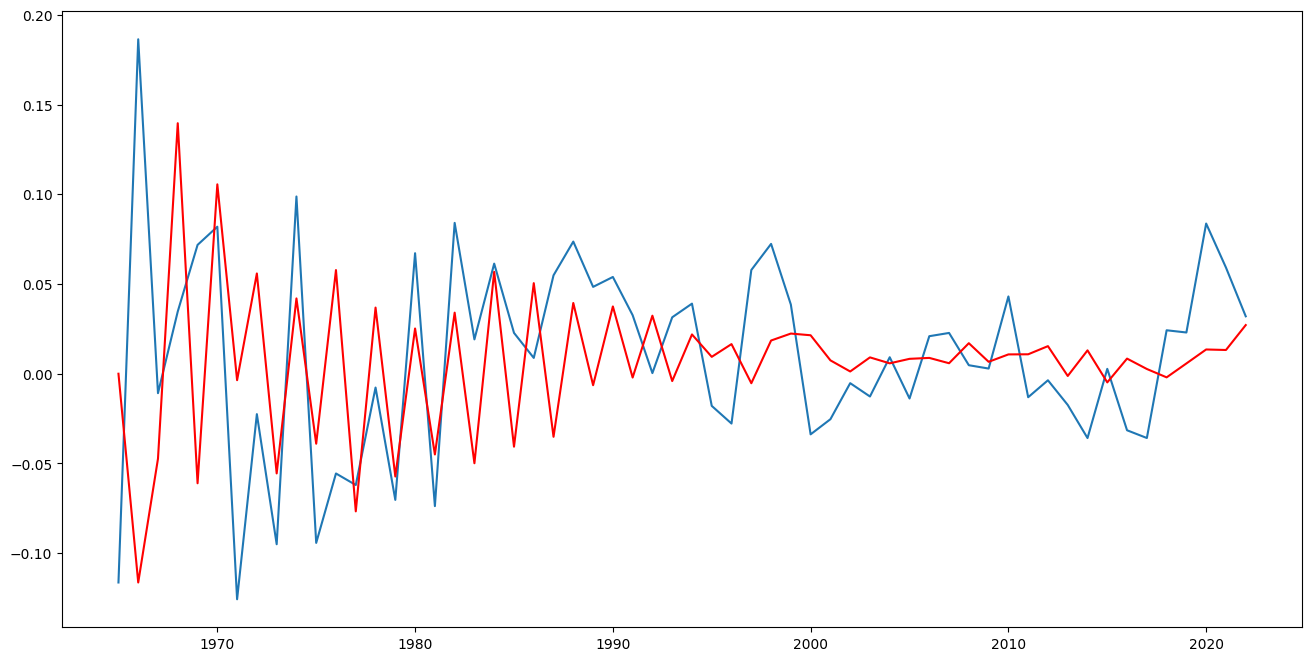

In [38]:
plt.figure(figsize=(16,8))
model = ARIMA(ds_log_diff,order=(2,1,2))
results_arima = model.fit()
plt.plot(ds_log_diff)
plt.plot(results_arima.fittedvalues,color='red')

### hwew we can observe that the model is not a very good fit so to choose the values of p,d,q we will use hyper parameter tuning to get the best values

# hyperparameter tuning

### to decide the p,d,q values

In [39]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [40]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                             start_p=1,
                             start_q=1,
                              max_p=15,
                              max_q=15,
                              test='adf',
                              seasonal=True,
                              trace=True
                             )
    return automodel

In [41]:
arimamodel(ds_log)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-156.505, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-120.314, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-152.344, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-157.108, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-154.939, Time=0.15 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.779 seconds


ARIMA(order=(0, 2, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

# creating the tuned model

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check

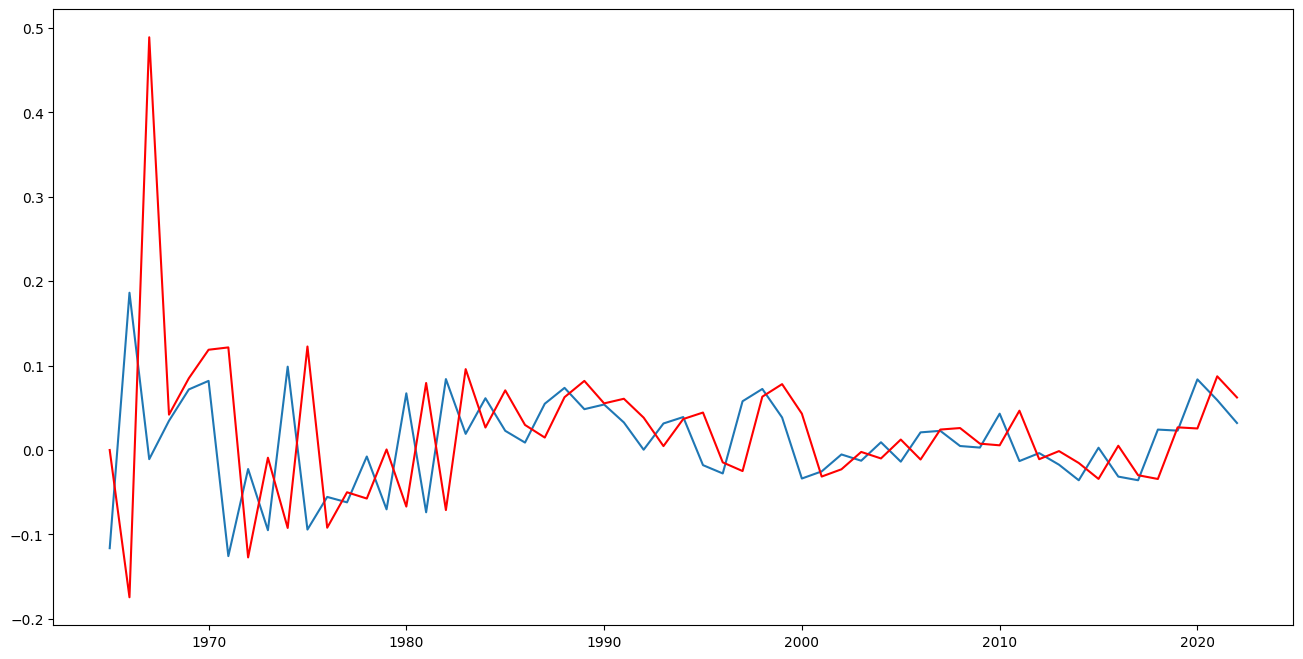

In [42]:
plt.figure(figsize=(16,8))
model2 = ARIMA(ds_log_diff,order=(0,2,1))
results_arima = model2.fit()
plt.plot(ds_log_diff)
plt.plot(results_arima.fittedvalues,color='red')

## final model summary

In [43]:
print(results_arima.summary())

                               SARIMAX Results                                
Dep. Variable:           Suicide_rate   No. Observations:                   58
Model:                 ARIMA(0, 2, 1)   Log Likelihood                  57.589
Date:                Mon, 05 Aug 2024   AIC                           -111.179
Time:                        15:49:04   BIC                           -107.128
Sample:                    01-01-1965   HQIC                          -109.608
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9954      2.324     -0.428      0.668      -5.550       3.559
sigma2         0.0070      0.016      0.434      0.664      -0.025       0.039
Ljung-Box (L1) (Q):                  10.11   Jarque-

## =======================================================================================================================================================

## other than best models

In [44]:
# temp1

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramete

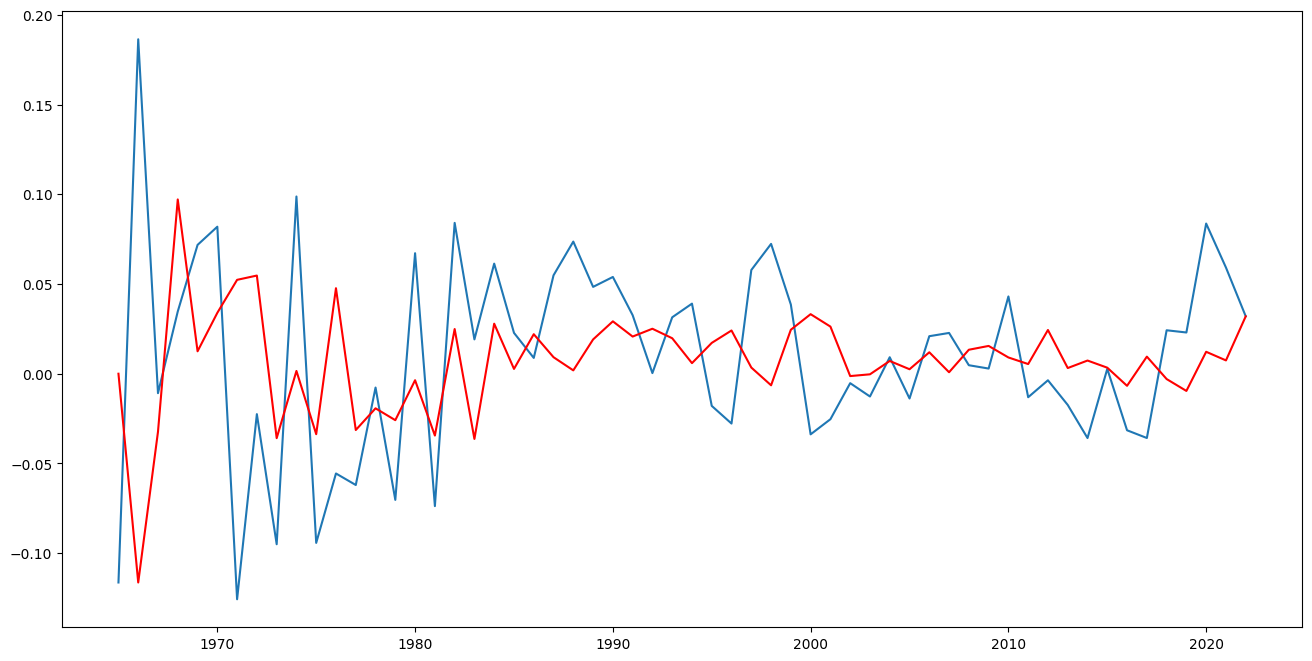

In [45]:
plt.figure(figsize=(16,8))
temp1 = ARIMA(ds_log_diff,order=(2,1,1))
temp1_result = temp1.fit()
plt.plot(ds_log_diff)
plt.plot(temp1_result.fittedvalues,color='red')

In [46]:
print(temp1_result.summary())

                               SARIMAX Results                                
Dep. Variable:           Suicide_rate   No. Observations:                   58
Model:                 ARIMA(2, 1, 1)   Log Likelihood                  83.607
Date:                Mon, 05 Aug 2024   AIC                           -159.213
Time:                        15:49:06   BIC                           -151.041
Sample:                    01-01-1965   HQIC                          -156.037
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0937      0.147     -0.636      0.525      -0.382       0.195
ar.L2          0.3513      0.156      2.259      0.024       0.046       0.656
ma.L1         -0.9925      0.735     -1.350      0.1

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


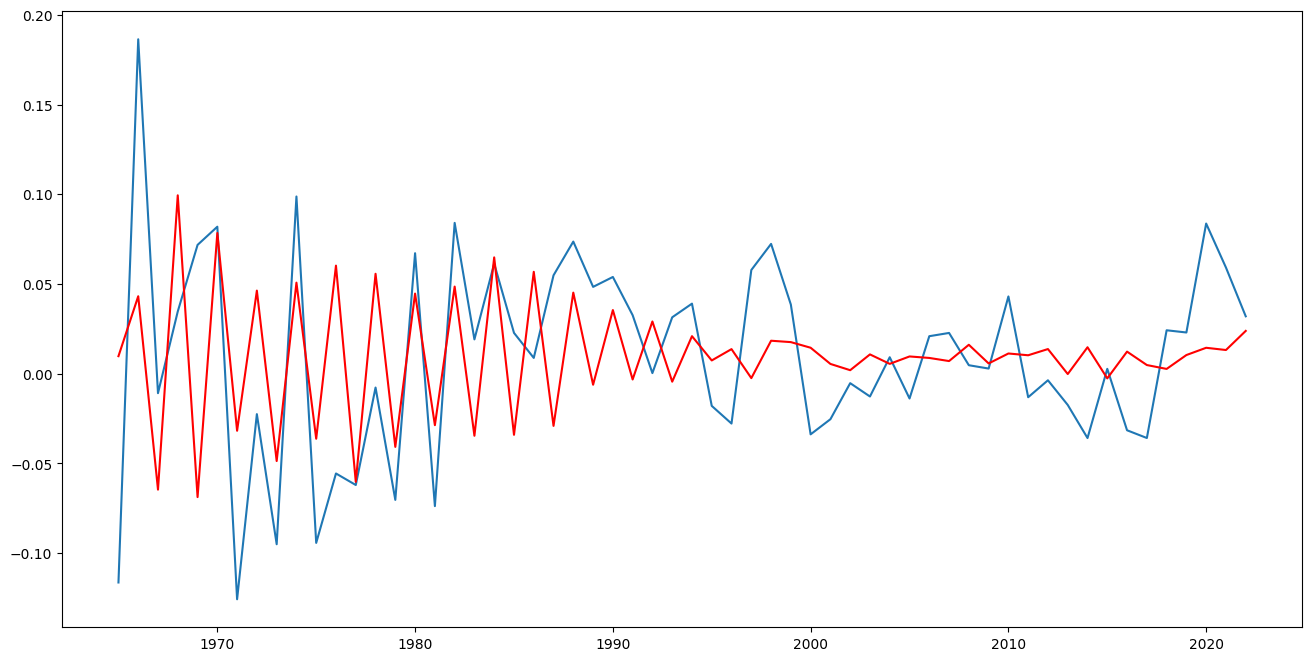

In [47]:
#temp2
plt.figure(figsize=(16,8))
temp2 = ARIMA(ds_log_diff,order=(1,0,2))
temp2_result = temp2.fit()
plt.plot(ds_log_diff)
plt.plot(temp2_result.fittedvalues,color='red')

In [48]:
print(temp2_result.summary())

                               SARIMAX Results                                
Dep. Variable:           Suicide_rate   No. Observations:                   58
Model:                 ARIMA(1, 0, 2)   Log Likelihood                  90.574
Date:                Mon, 05 Aug 2024   AIC                           -171.148
Time:                        15:49:07   BIC                           -160.846
Sample:                    01-01-1965   HQIC                          -167.135
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0098      0.008      1.166      0.243      -0.007       0.026
ar.L1         -0.9852      0.018    -54.347      0.000      -1.021      -0.950
ma.L1          1.0652      0.160      6.674      0.0

In [49]:
temp2_fitted_df = pd.DataFrame(temp2_result.fittedvalues, columns=['Suicide_rate'])

# Align the indices of the fitted values with the original data
temp2_fittedvalues = temp2_fitted_df.reindex(ds_log_diff.index)



In [50]:
temp2_fittedvalues.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58 entries, 1965-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suicide_rate  58 non-null     float64
dtypes: float64(1)
memory usage: 928.0 bytes


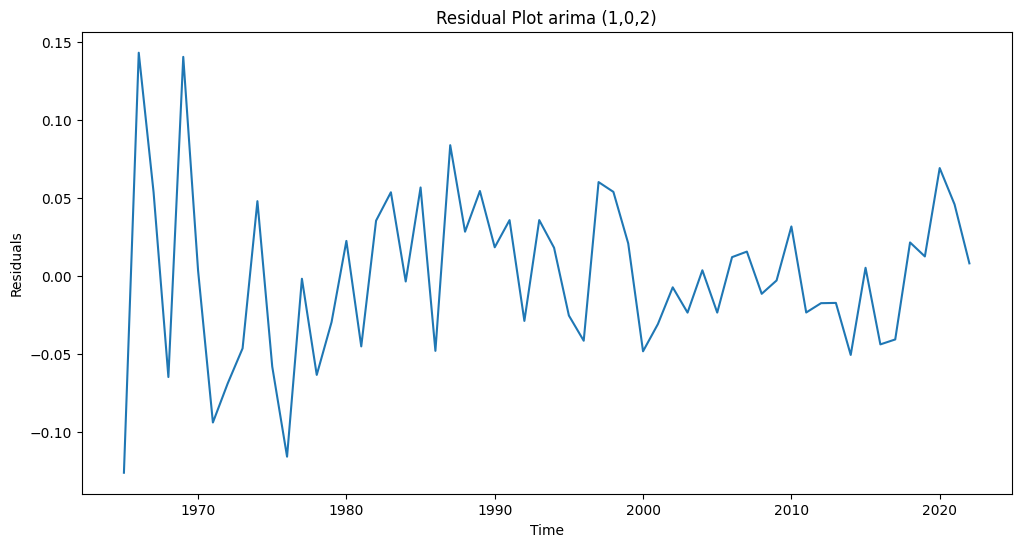

In [51]:
# Calculate residuals
temp2_residuals = ds_log_diff - temp2_fittedvalues

# Drop NaN values if any
temp2_residuals = temp2_residuals.dropna()

# Plot residuals
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(temp2_residuals)
plt.title('Residual Plot arima (1,0,2)')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()


In [52]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test
temp2_ljung_box = acorr_ljungbox(temp2_residuals, lags=[3], return_df=True)

# Print the Ljung-Box statistic and p-value
print(temp2_ljung_box)


    lb_stat  lb_pvalue
3  3.505795   0.320011


In [53]:
temp2_lastlog = ds_log.iloc[-1]

In [54]:
temp2_lastlog

Suicide_rate    2.516732
Name: 2022-01-01 00:00:00, dtype: float64

In [55]:
# Get the forecast, lower, and upper interval
temp_results = temp2_result.get_forecast(steps=10, alpha=0.05).summary_frame()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [56]:
temp_results

Suicide_rate      mean   mean_se  mean_ci_lower  mean_ci_upper
2023-01-01    0.005708  0.050200      -0.092683       0.104098
2024-01-01    0.015414  0.050360      -0.083290       0.114119
2025-01-01    0.004231  0.050722      -0.095182       0.103643
2026-01-01    0.015249  0.051070      -0.084846       0.115344
2027-01-01    0.004393  0.051406      -0.096360       0.105147
2028-01-01    0.015089  0.051730      -0.086299       0.116477
2029-01-01    0.004551  0.052042      -0.097449       0.106552
2030-01-01    0.014933  0.052343      -0.087658       0.117525
2031-01-01    0.004705  0.052634      -0.098457       0.107866
2032-01-01    0.014782  0.052915      -0.088930       0.118495

In [57]:
# Reverse differencing
temp_forecast_diff = temp_results.copy()
temp_forecast_diff

Suicide_rate      mean   mean_se  mean_ci_lower  mean_ci_upper
2023-01-01    0.005708  0.050200      -0.092683       0.104098
2024-01-01    0.015414  0.050360      -0.083290       0.114119
2025-01-01    0.004231  0.050722      -0.095182       0.103643
2026-01-01    0.015249  0.051070      -0.084846       0.115344
2027-01-01    0.004393  0.051406      -0.096360       0.105147
2028-01-01    0.015089  0.051730      -0.086299       0.116477
2029-01-01    0.004551  0.052042      -0.097449       0.106552
2030-01-01    0.014933  0.052343      -0.087658       0.117525
2031-01-01    0.004705  0.052634      -0.098457       0.107866
2032-01-01    0.014782  0.052915      -0.088930       0.118495

In [58]:
temp_forecast_diff.iloc[:,0:] += 2.516732
temp_forecast_diff

Suicide_rate      mean   mean_se  mean_ci_lower  mean_ci_upper
2023-01-01    2.522440  2.566932       2.424049       2.620830
2024-01-01    2.532146  2.567092       2.433442       2.630851
2025-01-01    2.520963  2.567454       2.421550       2.620375
2026-01-01    2.531981  2.567802       2.431886       2.632076
2027-01-01    2.521125  2.568138       2.420372       2.621879
2028-01-01    2.531821  2.568462       2.430433       2.633209
2029-01-01    2.521283  2.568774       2.419283       2.623284
2030-01-01    2.531665  2.569075       2.429074       2.634257
2031-01-01    2.521437  2.569366       2.418275       2.624598
2032-01-01    2.531514  2.569647       2.427802       2.635227

In [59]:
# Exponentiate to reverse log transformation
temp_forecast_exp = np.exp(temp_forecast_diff)

In [60]:
temp_forecast_exp

Suicide_rate       mean    mean_se  mean_ci_lower  mean_ci_upper
2023-01-01    12.458958  13.025801      11.291492      13.747133
2024-01-01    12.580481  13.027888      11.398047      13.885580
2025-01-01    12.440566  13.032596      11.263305      13.740877
2026-01-01    12.578403  13.037136      11.380327      13.902607
2027-01-01    12.442591  13.041514      11.250044      13.761552
2028-01-01    12.576386  13.045739      11.363801      13.918362
2029-01-01    12.444556  13.049815      11.237798      13.780902
2030-01-01    12.574429  13.053750      11.348369      13.932952
2031-01-01    12.446465  13.057550      11.226476      13.799030
2032-01-01    12.572530  13.061219      11.333942      13.946473

In [61]:
temp_forecast_exp.to_csv('thy_best.csv')

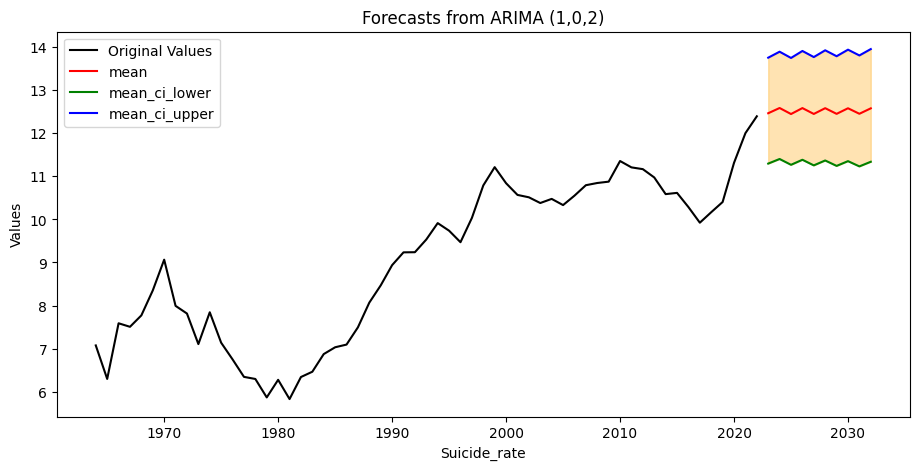

In [62]:
plt.figure(figsize=(11,5))
plt.plot(new_ds['Suicide_rate'],color='black')
plt.plot(temp_forecast_exp['mean'],color='red')
plt.plot(temp_forecast_exp['mean_ci_lower'],color='green')
plt.plot(temp_forecast_exp['mean_ci_upper'],color='blue')
plt.legend(['Original Values','mean','mean_ci_lower','mean_ci_upper'],loc="best")
plt.fill_between(temp_forecast_exp.index,temp_forecast_exp['mean_ci_lower'],temp_forecast_exp['mean_ci_upper'],color='orange',alpha=0.3)
plt.xlabel('Suicide_rate')
plt.ylabel('Values')
plt.title('Forecasts from ARIMA (1,0,2)')
plt.show()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


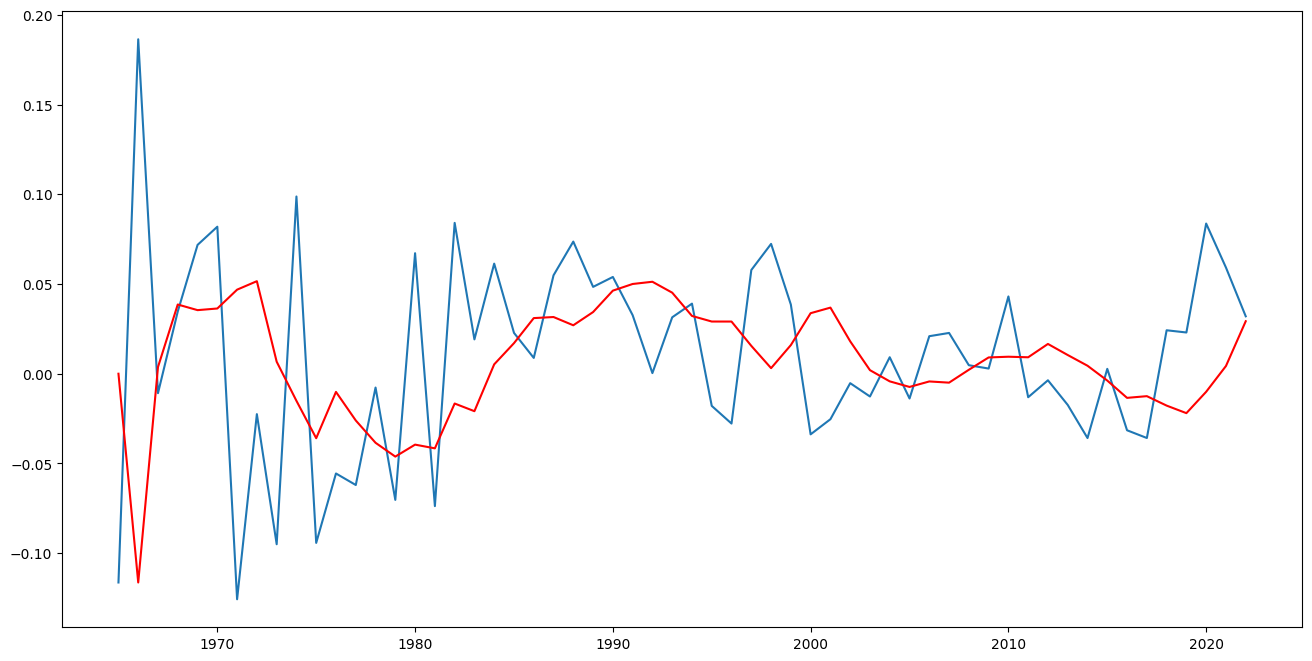

In [63]:
#temp3
plt.figure(figsize=(16,8))
temp3 = ARIMA(ds_log_diff,order=(0,1,2))
temp3_result = temp3.fit()
plt.plot(ds_log_diff)
plt.plot(temp3_result.fittedvalues,color='red')

In [64]:

print(temp3_result.summary())

                               SARIMAX Results                                
Dep. Variable:           Suicide_rate   No. Observations:                   58
Model:                 ARIMA(0, 1, 2)   Log Likelihood                  80.470
Date:                Mon, 05 Aug 2024   AIC                           -154.939
Time:                        15:49:11   BIC                           -148.810
Sample:                    01-01-1965   HQIC                          -152.557
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9641      0.118     -8.163      0.000      -1.196      -0.733
ma.L2          0.2450      0.134      1.827      0.068      -0.018       0.508
sigma2         0.0034      0.001      6.421      0.0

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


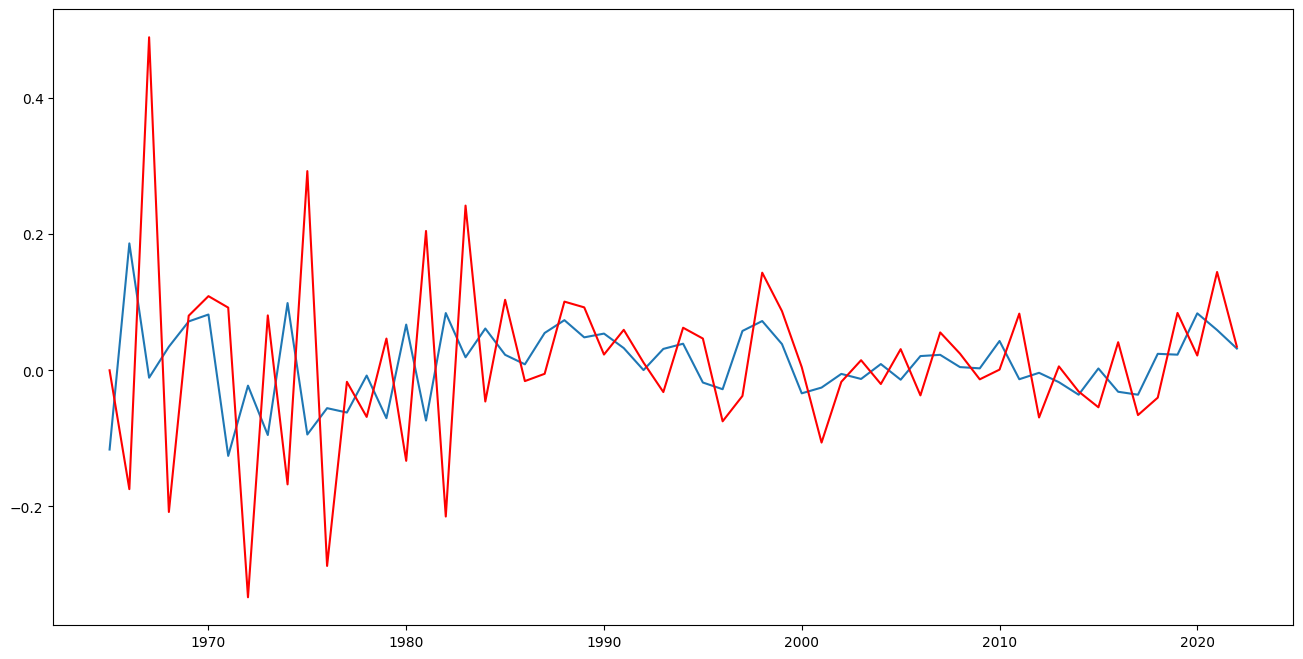

In [65]:
# temp 4 
plt.figure(figsize=(16,8))
temp4 = ARIMA(ds_log_diff,order=(0,2,0))
temp4_result = temp4.fit()
plt.plot(ds_log_diff)
plt.plot(temp4_result.fittedvalues,color='red')

In [66]:
print(temp4_result.summary())

                               SARIMAX Results                                
Dep. Variable:           Suicide_rate   No. Observations:                   58
Model:                 ARIMA(0, 2, 0)   Log Likelihood                  29.337
Date:                Mon, 05 Aug 2024   AIC                            -56.675
Time:                        15:49:11   BIC                            -54.650
Sample:                    01-01-1965   HQIC                           -55.890
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0205      0.003      7.855      0.000       0.015       0.026
Ljung-Box (L1) (Q):                  28.72   Jarque-Bera (JB):                16.04
Prob(Q):                              0.00   Pr

## ====================================================================================================================

# forecasting new values for the next 10 years

In [67]:
# Get the forecast, lower, and upper interval
final_results = results_arima.get_forecast(steps=10, alpha=0.05).summary_frame()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [68]:
final_results

Suicide_rate      mean   mean_se  mean_ci_lower  mean_ci_upper
2023-01-01    0.034584  0.084188      -0.130421       0.199590
2024-01-01    0.037169  0.120106      -0.198234       0.272573
2025-01-01    0.039755  0.148371      -0.251047       0.330556
2026-01-01    0.042340  0.172780      -0.296304       0.380983
2027-01-01    0.044925  0.194791      -0.336858       0.426708
2028-01-01    0.047510  0.215140      -0.374157       0.469176
2029-01-01    0.050095  0.234262      -0.409050       0.509240
2030-01-01    0.052680  0.252437      -0.442087       0.547447
2031-01-01    0.055265  0.269856      -0.473642       0.584172
2032-01-01    0.057850  0.286657      -0.503988       0.619688

# transforming the forecasted values back to match the original values 

## finding the last log value in the (log transformed data) to reverse the differencing operation by adding back the differenced value

In [69]:
# Get the last observed value from log-transformed data
last_log_value = ds_log.iloc[-1]

In [70]:
last_log_value

Suicide_rate    2.516732
Name: 2022-01-01 00:00:00, dtype: float64

In [71]:
# Reverse differencing
forecast_diff = final_results.copy()

forecast_diff


Suicide_rate      mean   mean_se  mean_ci_lower  mean_ci_upper
2023-01-01    0.034584  0.084188      -0.130421       0.199590
2024-01-01    0.037169  0.120106      -0.198234       0.272573
2025-01-01    0.039755  0.148371      -0.251047       0.330556
2026-01-01    0.042340  0.172780      -0.296304       0.380983
2027-01-01    0.044925  0.194791      -0.336858       0.426708
2028-01-01    0.047510  0.215140      -0.374157       0.469176
2029-01-01    0.050095  0.234262      -0.409050       0.509240
2030-01-01    0.052680  0.252437      -0.442087       0.547447
2031-01-01    0.055265  0.269856      -0.473642       0.584172
2032-01-01    0.057850  0.286657      -0.503988       0.619688

## adding the last log value to the forecasted value to reverse the differencing operation 

In [72]:
forecast_diff.iloc[:,0:] += 2.516732
forecast_diff

Suicide_rate      mean   mean_se  mean_ci_lower  mean_ci_upper
2023-01-01    2.551316  2.600920       2.386311       2.716322
2024-01-01    2.553901  2.636838       2.318498       2.789305
2025-01-01    2.556487  2.665103       2.265685       2.847288
2026-01-01    2.559072  2.689512       2.220428       2.897715
2027-01-01    2.561657  2.711523       2.179874       2.943440
2028-01-01    2.564242  2.731872       2.142575       2.985908
2029-01-01    2.566827  2.750994       2.107682       3.025972
2030-01-01    2.569412  2.769169       2.074645       3.064179
2031-01-01    2.571997  2.786588       2.043090       3.100904
2032-01-01    2.574582  2.803389       2.012744       3.136420

## performing the exponentiation operation to reverse the log transformation

In [73]:
# Exponentiate to reverse log transformation
forecast_exp = np.exp(forecast_diff)

### this is the final predicted values matching the original dataset values

In [74]:
forecast_exp

Suicide_rate       mean    mean_se  mean_ci_lower  mean_ci_upper
2023-01-01    12.823974  13.476131      10.873307      15.124590
2024-01-01    12.857168  13.968966      10.160399      16.269711
2025-01-01    12.890448  14.369426       9.637727      17.240958
2026-01-01    12.923814  14.724496       9.211274      18.132668
2027-01-01    12.957266  15.052179       8.845190      18.981021
2028-01-01    12.990805  15.361617       8.521354      19.804485
2029-01-01    13.024431  15.658189       8.229142      20.614033
2030-01-01    13.058144  15.945371       7.961723      21.416861
2031-01-01    13.091944  16.225557       7.714409      22.218034
2032-01-01    13.125832  16.500479       7.483824      23.021312

In [75]:
forecast_exp.to_csv('visual best.csv')

# graph representing the original suicide rates and the forecasted values with the CI

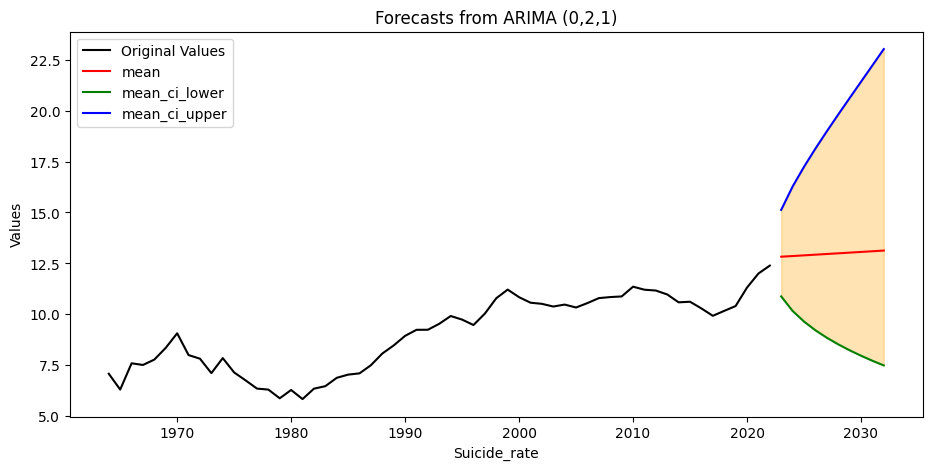

In [76]:
plt.figure(figsize=(11,5))
plt.plot(new_ds['Suicide_rate'],color='black')
plt.plot(forecast_exp['mean'],color='red')
plt.plot(forecast_exp['mean_ci_lower'],color='green')
plt.plot(forecast_exp['mean_ci_upper'],color='blue')
plt.legend(['Original Values','mean','mean_ci_lower','mean_ci_upper'],loc="best")
plt.fill_between(forecast_exp.index,forecast_exp['mean_ci_lower'],forecast_exp['mean_ci_upper'],color='orange',alpha=0.3)
plt.xlabel('Suicide_rate')
plt.ylabel('Values')
plt.title('Forecasts from ARIMA (0,2,1)')
plt.show()

In [77]:
ds_log_diff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58 entries, 1965-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suicide_rate  58 non-null     float64
dtypes: float64(1)
memory usage: 928.0 bytes


In [78]:
fitted_values_df = pd.DataFrame(results_arima.fittedvalues, columns=['Suicide_rate'])

# Align the indices of the fitted values with the original data
aligned_fittedvalues = fitted_values_df.reindex(ds_log_diff.index)



In [79]:
aligned_fittedvalues.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58 entries, 1965-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suicide_rate  58 non-null     float64
dtypes: float64(1)
memory usage: 928.0 bytes


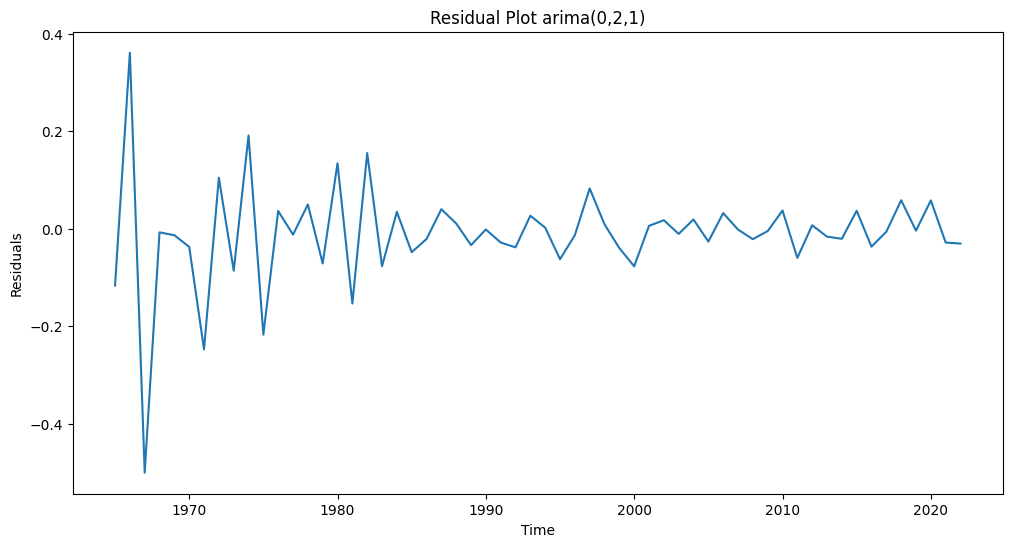

In [80]:
# Calculate residuals
residuals = ds_log_diff - aligned_fittedvalues

# Drop NaN values if any
residuals = residuals.dropna()

# Plot residuals
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residual Plot arima(0,2,1)')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()


In [81]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test
ljung_box_results = acorr_ljungbox(residuals, lags=[3], return_df=True)

# Print the Ljung-Box statistic and p-value
print(ljung_box_results)


    lb_stat  lb_pvalue
3  26.21905   0.000009


## ================================================================================================================================

# acc to aic , bic and log likelyhood model temp2 is performing best so we will try predictions using that as well

In [82]:
print(temp2_result.summary())

                               SARIMAX Results                                
Dep. Variable:           Suicide_rate   No. Observations:                   58
Model:                 ARIMA(1, 0, 2)   Log Likelihood                  90.574
Date:                Mon, 05 Aug 2024   AIC                           -171.148
Time:                        15:49:17   BIC                           -160.846
Sample:                    01-01-1965   HQIC                          -167.135
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0098      0.008      1.166      0.243      -0.007       0.026
ar.L1         -0.9852      0.018    -54.347      0.000      -1.021      -0.950
ma.L1          1.0652      0.160      6.674      0.0

In [83]:
# Get the forecast, lower, and upper interval
temp2_final_result = temp2_result.get_forecast(steps=10, alpha=0.05).summary_frame()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [84]:
temp2_final_result

Suicide_rate      mean   mean_se  mean_ci_lower  mean_ci_upper
2023-01-01    0.005708  0.050200      -0.092683       0.104098
2024-01-01    0.015414  0.050360      -0.083290       0.114119
2025-01-01    0.004231  0.050722      -0.095182       0.103643
2026-01-01    0.015249  0.051070      -0.084846       0.115344
2027-01-01    0.004393  0.051406      -0.096360       0.105147
2028-01-01    0.015089  0.051730      -0.086299       0.116477
2029-01-01    0.004551  0.052042      -0.097449       0.106552
2030-01-01    0.014933  0.052343      -0.087658       0.117525
2031-01-01    0.004705  0.052634      -0.098457       0.107866
2032-01-01    0.014782  0.052915      -0.088930       0.118495

In [85]:
# getting the last log values

temp2_lastlog = ds_log.iloc[-1]
temp2_lastlog

Suicide_rate    2.516732
Name: 2022-01-01 00:00:00, dtype: float64

In [86]:
temp2_final_diff = temp2_final_result.copy()
temp2_final_diff

Suicide_rate      mean   mean_se  mean_ci_lower  mean_ci_upper
2023-01-01    0.005708  0.050200      -0.092683       0.104098
2024-01-01    0.015414  0.050360      -0.083290       0.114119
2025-01-01    0.004231  0.050722      -0.095182       0.103643
2026-01-01    0.015249  0.051070      -0.084846       0.115344
2027-01-01    0.004393  0.051406      -0.096360       0.105147
2028-01-01    0.015089  0.051730      -0.086299       0.116477
2029-01-01    0.004551  0.052042      -0.097449       0.106552
2030-01-01    0.014933  0.052343      -0.087658       0.117525
2031-01-01    0.004705  0.052634      -0.098457       0.107866
2032-01-01    0.014782  0.052915      -0.088930       0.118495

In [87]:
# removing the differenceing operation 

temp2_final_diff.iloc[:,0:] += 2.516732

In [88]:
temp2_final_diff

Suicide_rate      mean   mean_se  mean_ci_lower  mean_ci_upper
2023-01-01    2.522440  2.566932       2.424049       2.620830
2024-01-01    2.532146  2.567092       2.433442       2.630851
2025-01-01    2.520963  2.567454       2.421550       2.620375
2026-01-01    2.531981  2.567802       2.431886       2.632076
2027-01-01    2.521125  2.568138       2.420372       2.621879
2028-01-01    2.531821  2.568462       2.430433       2.633209
2029-01-01    2.521283  2.568774       2.419283       2.623284
2030-01-01    2.531665  2.569075       2.429074       2.634257
2031-01-01    2.521437  2.569366       2.418275       2.624598
2032-01-01    2.531514  2.569647       2.427802       2.635227

In [89]:
# performing exponentiation operation

temp2_final_exp= np.exp(temp2_final_diff)

In [90]:
temp2_final_exp

Suicide_rate       mean    mean_se  mean_ci_lower  mean_ci_upper
2023-01-01    12.458958  13.025801      11.291492      13.747133
2024-01-01    12.580481  13.027888      11.398047      13.885580
2025-01-01    12.440566  13.032596      11.263305      13.740877
2026-01-01    12.578403  13.037136      11.380327      13.902607
2027-01-01    12.442591  13.041514      11.250044      13.761552
2028-01-01    12.576386  13.045739      11.363801      13.918362
2029-01-01    12.444556  13.049815      11.237798      13.780902
2030-01-01    12.574429  13.053750      11.348369      13.932952
2031-01-01    12.446465  13.057550      11.226476      13.799030
2032-01-01    12.572530  13.061219      11.333942      13.946473

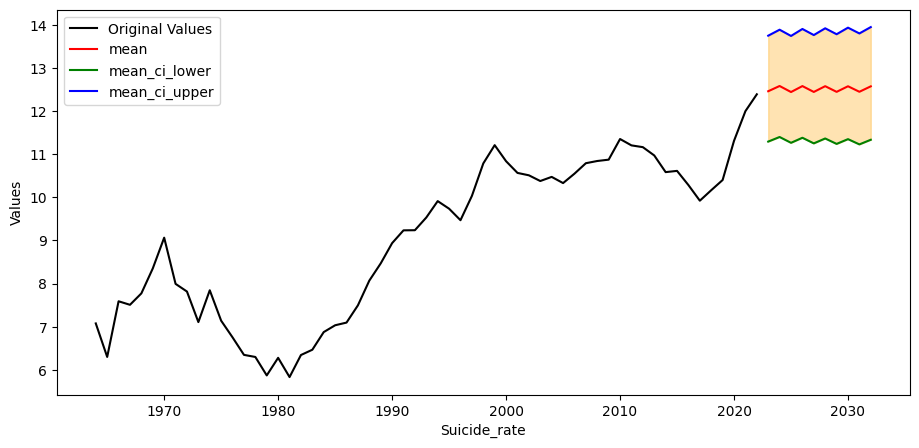

In [91]:
plt.figure(figsize=(11,5))
plt.plot(new_ds['Suicide_rate'],color='black')
plt.plot(temp2_final_exp['mean'],color='red')
plt.plot(temp2_final_exp['mean_ci_lower'],color='green')
plt.plot(temp2_final_exp['mean_ci_upper'],color='blue')
plt.legend(['Original Values','mean','mean_ci_lower','mean_ci_upper'],loc="best")
plt.fill_between(temp2_final_exp.index,temp2_final_exp['mean_ci_lower'],temp2_final_exp['mean_ci_upper'],color='orange',alpha=0.3)
plt.xlabel('Suicide_rate')
plt.ylabel('Values')
plt.show()

## ======================================================================================================

# models for the 3 categories infertility , illness , addiction

In [92]:
infertility = ds[['Year','Infertility']]
illness = ds[['Year','Illness']]
drugs = ds[['Year','Addiction']]

# code for infertility prediction

In [93]:
infertility.head()

Year  Infertility
0 1964-01-01          NaN
1 1965-01-01          NaN
2 1966-01-01          NaN
3 1967-01-01          NaN
4 1968-01-01          NaN

In [94]:
infertility.isnull().sum()

Year            0
Infertility    31
dtype: int64

In [95]:
infertility.dropna(inplace = True)

/tmp/ipykernel_18/3605920501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infertility.dropna(inplace = True)


In [96]:
infertility.duplicated().sum()

0

In [97]:
infertility.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 31 to 58
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year         28 non-null     datetime64[ns]
 1   Infertility  28 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 672.0 bytes


In [98]:
infertility.head()

Year  Infertility
31 1995-01-01        495.0
32 1996-01-01        608.0
33 1997-01-01        574.0
34 1998-01-01        831.0
35 1999-01-01        855.0

# preprocessing the infertility data

In [99]:
infertility.index = pd.to_datetime(infertility['Year'])

In [100]:
infertility.head()

Year  Infertility
Year                              
1995-01-01 1995-01-01        495.0
1996-01-01 1996-01-01        608.0
1997-01-01 1997-01-01        574.0
1998-01-01 1998-01-01        831.0
1999-01-01 1999-01-01        855.0

In [101]:
infertility.sort_index(inplace=True)

In [102]:
infertility.drop('Year',axis=1,inplace=True)

/tmp/ipykernel_18/1341125576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infertility.drop('Year',axis=1,inplace=True)


In [103]:
infertility.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 1995-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Infertility  28 non-null     float64
dtypes: float64(1)
memory usage: 448.0 bytes


## checking data stationarity for infertility data

In [104]:
infresult = adfuller(infertility)
print("adf statistic : ",infresult[0])
print("p value : ",infresult[1])
print("critical values : ",infresult[4])

adf statistic :  -0.5049134915492697
p value :  0.8910540897429686
critical values :  {'1%': -3.7112123008648155, '5%': -2.981246804733728, '10%': -2.6300945562130176}


### not stationary since p value > 0.05

## log transformation  and differencing transformation

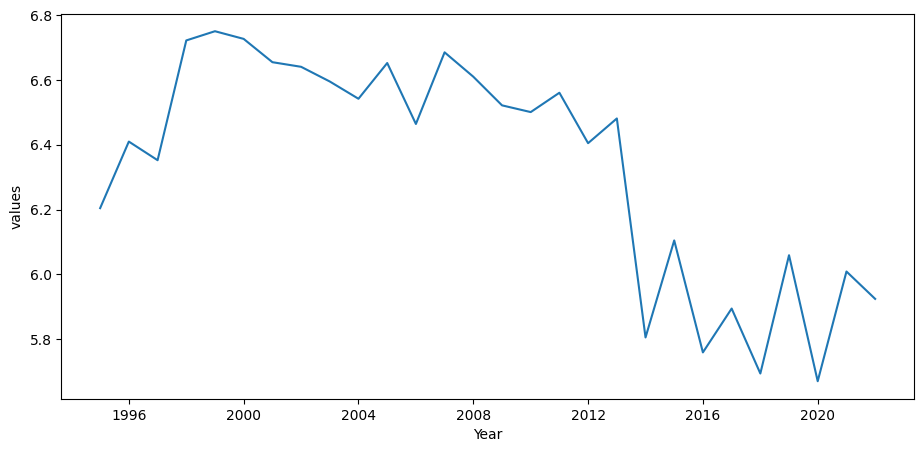

In [105]:
plt.figure(figsize=(11,5))
fig = plt.figure(1)
inf_log = np.log(infertility)
plt.plot(inf_log)
plt.xlabel('Year')
plt.ylabel('values')
plt.show()

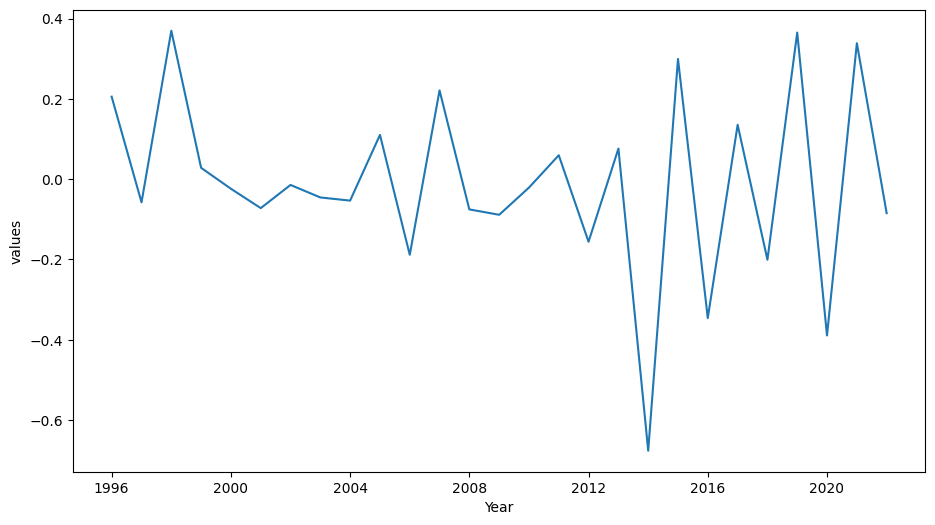

In [106]:
plt.figure(figsize=(11,6))
fig = plt.figure(1)

inf_log_diff = inf_log - inf_log.shift()
plt.plot(inf_log_diff)
plt.xlabel('Year')
plt.ylabel('values')
plt.show()

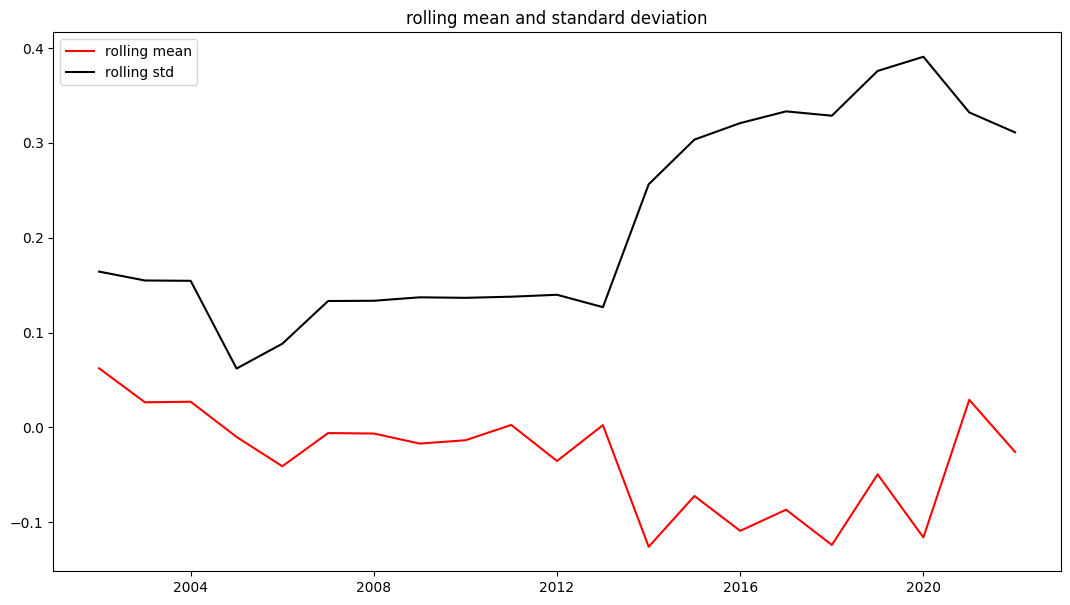

In [107]:
rollmean = inf_log_diff.rolling(7).mean() 
rollstd = inf_log_diff.rolling(7).std()

plt.figure(figsize=(13,7))
mean = plt.plot(rollmean,label = 'rolling mean',color='red')
std = plt.plot(rollstd , label='rolling std',color='black')
plt.legend(loc='best')
plt.title('rolling mean and standard deviation')
plt.show(block=False)


In [108]:
inf_log_diff.isnull().sum()

Infertility    1
dtype: int64

In [109]:
inf_log_diff.dropna(inplace=True)

## confirming the adfuller test

In [110]:
infresult2 = adfuller(inf_log_diff)
print("adf statistic : ",infresult2[0])
print("p value : ",infresult2[1])
print("critical values : ",infresult2[4])

adf statistic :  -10.626939424584576
p value :  5.3350437265160295e-19
critical values :  {'1%': -3.7112123008648155, '5%': -2.981246804733728, '10%': -2.6300945562130176}


## we can see here that the p value is very less than 0.05 so our data is finaalyy stationary

In [111]:
log_acf_inf = acf(inf_log_diff,nlags=8)
log_pacf_inf = pacf(inf_log_diff,nlags=8)

## deciding AR and MA term for infertility

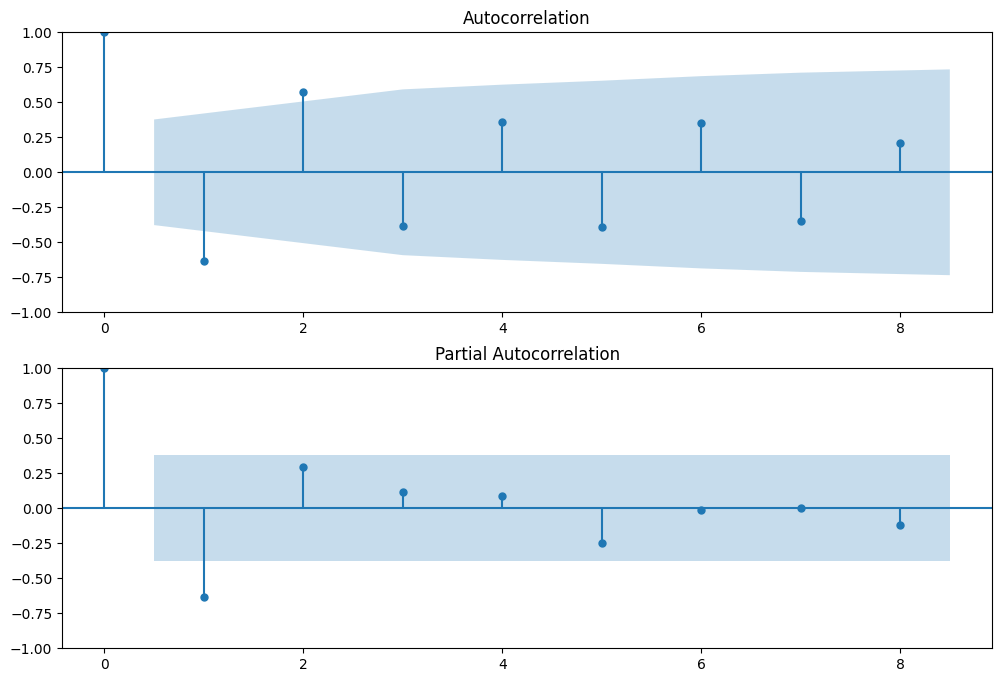

In [112]:
# selecting the ar and ma terms

import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(inf_log_diff.dropna(),lags=8,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(inf_log_diff.dropna(),lags=8,ax=ax2)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


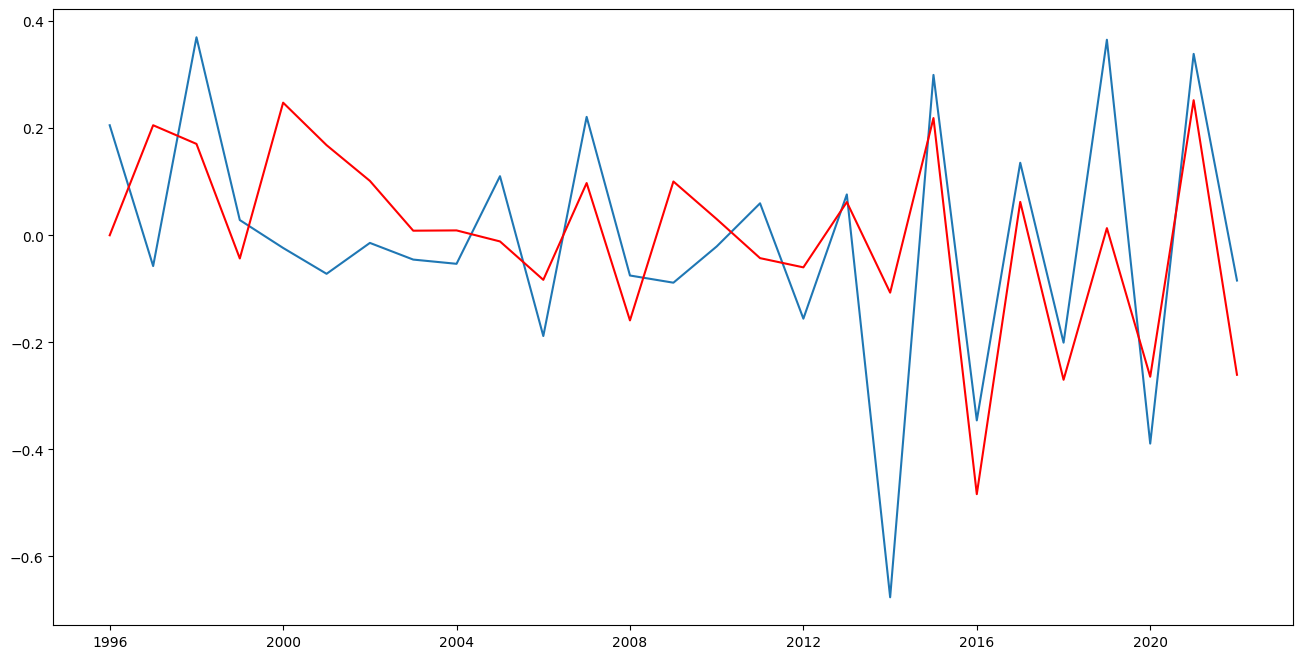

In [113]:
plt.figure(figsize=(16,8))
model = ARIMA(inf_log_diff,order=(1,1,1))
inf_result = model.fit()
plt.plot(inf_log_diff)
plt.plot(inf_result.fittedvalues,color='red')

# creating tuned model

In [114]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                             start_p=1,
                             start_q=1,
                              max_p=13,
                              max_q=13,
                              test='adf',
                              seasonal=True,
                              trace=True
                             )
    return automodel

In [115]:
arimamodel(inf_log)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-7.378, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=31.541, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-4.538, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-5.692, Time=0.13 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-5.697, Time=0.08 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-0.410, Time=0.08 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-5.313, Time=0.03 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-5.461, Time=0.06 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0]          
Total fit time: 0.788 seconds


ARIMA(order=(1, 2, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


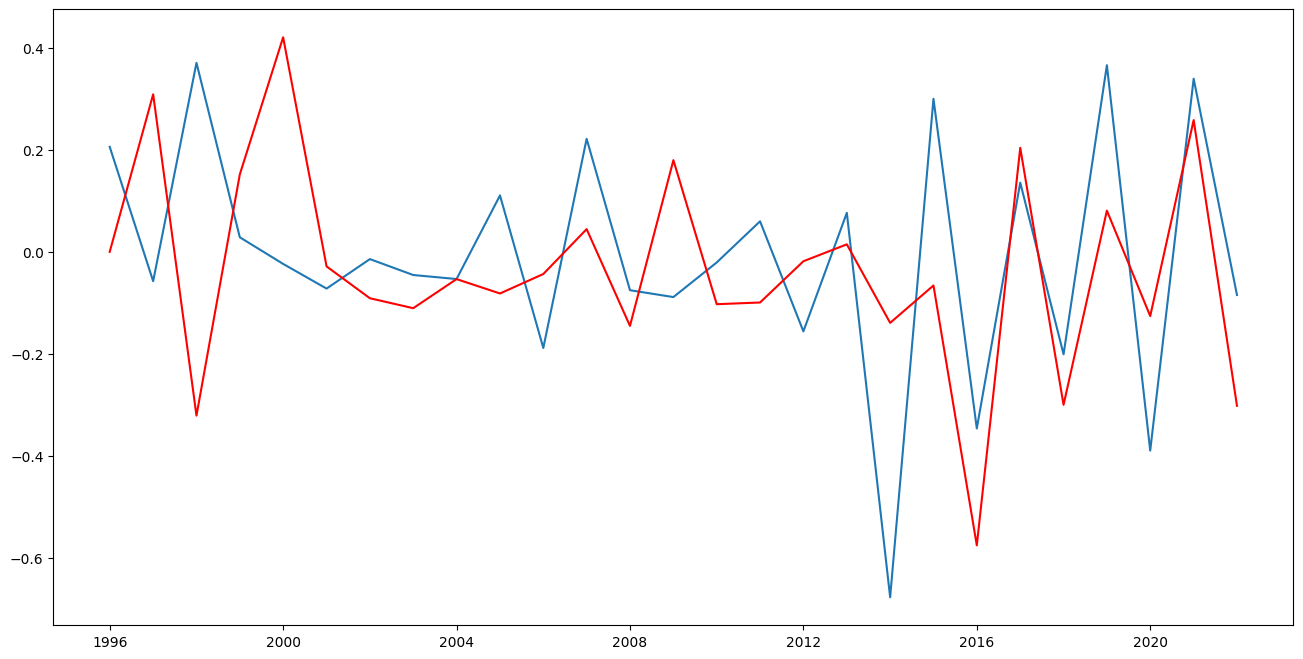

In [116]:
plt.figure(figsize=(16,8))
model2 = ARIMA(inf_log_diff,order=(1,2,1))
inf_result= model2.fit()
plt.plot(inf_log_diff)
plt.plot(inf_result.fittedvalues,color='red')

In [117]:
print(inf_result.summary())

                               SARIMAX Results                                
Dep. Variable:            Infertility   No. Observations:                   27
Model:                 ARIMA(1, 2, 1)   Log Likelihood                   1.350
Date:                Mon, 05 Aug 2024   AIC                              3.301
Time:                        15:49:29   BIC                              6.957
Sample:                    01-01-1996   HQIC                             4.315
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8706      0.099     -8.825      0.000      -1.064      -0.677
ma.L1         -0.9969      6.193     -0.161      0.872     -13.135      11.141
sigma2         0.0416      0.254      0.164      0.8

In [118]:
# Get the forecast, lower, and upper interval
inf_final_results = inf_result.get_forecast(steps=10, alpha=0.05).summary_frame()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [119]:
inf_final_results

Infertility      mean   mean_se  mean_ci_lower  mean_ci_upper
2023-01-01   0.286368  0.207760      -0.120834       0.693570
2024-01-01  -0.034342  0.210515      -0.446944       0.378259
2025-01-01   0.247101  0.285711      -0.312881       0.807084
2026-01-01   0.004296  0.292211      -0.568427       0.577019
2027-01-01   0.217914  0.345143      -0.458554       0.894382
2028-01-01   0.034159  0.355118      -0.661860       0.730178
2029-01-01   0.196366  0.397199      -0.582129       0.974861
2030-01-01   0.057371  0.410078      -0.746367       0.861109
2031-01-01   0.180609  0.445829      -0.693200       1.054418
2032-01-01   0.075541  0.461014      -0.828031       0.979112

## last log value to reverse the differencing transformation

In [120]:
last_log_inf = inf_log.iloc[-1]
last_log_inf

Infertility    5.924256
Name: 2022-01-01 00:00:00, dtype: float64

In [121]:
inf_forecasted = inf_final_results.copy()
inf_forecasted

Infertility      mean   mean_se  mean_ci_lower  mean_ci_upper
2023-01-01   0.286368  0.207760      -0.120834       0.693570
2024-01-01  -0.034342  0.210515      -0.446944       0.378259
2025-01-01   0.247101  0.285711      -0.312881       0.807084
2026-01-01   0.004296  0.292211      -0.568427       0.577019
2027-01-01   0.217914  0.345143      -0.458554       0.894382
2028-01-01   0.034159  0.355118      -0.661860       0.730178
2029-01-01   0.196366  0.397199      -0.582129       0.974861
2030-01-01   0.057371  0.410078      -0.746367       0.861109
2031-01-01   0.180609  0.445829      -0.693200       1.054418
2032-01-01   0.075541  0.461014      -0.828031       0.979112

In [122]:
inf_forecasted.iloc[:,0:] += 5.924256
inf_forecasted

Infertility      mean   mean_se  mean_ci_lower  mean_ci_upper
2023-01-01   6.210624  6.132016       5.803422       6.617826
2024-01-01   5.889914  6.134771       5.477312       6.302515
2025-01-01   6.171357  6.209967       5.611375       6.731340
2026-01-01   5.928552  6.216467       5.355829       6.501275
2027-01-01   6.142170  6.269399       5.465702       6.818638
2028-01-01   5.958415  6.279374       5.262396       6.654434
2029-01-01   6.120622  6.321455       5.342127       6.899117
2030-01-01   5.981627  6.334334       5.177889       6.785365
2031-01-01   6.104865  6.370085       5.231056       6.978674
2032-01-01   5.999797  6.385270       5.096225       6.903368

In [123]:
# Exponentiate to reverse log transformation
inf_forecasted_exp = np.exp(inf_forecasted)

# final results of the infertility 

In [124]:
inf_forecasted_exp

Infertility        mean     mean_se  mean_ci_lower  mean_ci_upper
2023-01-01   498.012022  460.363344     331.431777     748.316821
2024-01-01   361.374101  461.633259     239.202950     545.943269
2025-01-01   478.835656  497.684582     273.520107     838.269579
2026-01-01   375.610201  500.930204     211.839584     665.989900
2027-01-01   465.061559  528.159928     236.441702     914.738186
2028-01-01   386.996244  533.454650     192.943303     776.218148
2029-01-01   455.147680  556.381674     208.956718     991.398663
2030-01-01   396.084144  563.593845     177.308090     884.802544
2031-01-01   448.032132  584.107469     186.990197    1073.493661
2032-01-01   403.346787  593.045050     163.403917     995.622588

## graph showing the initial infertility values with its forecasted mean and CI values

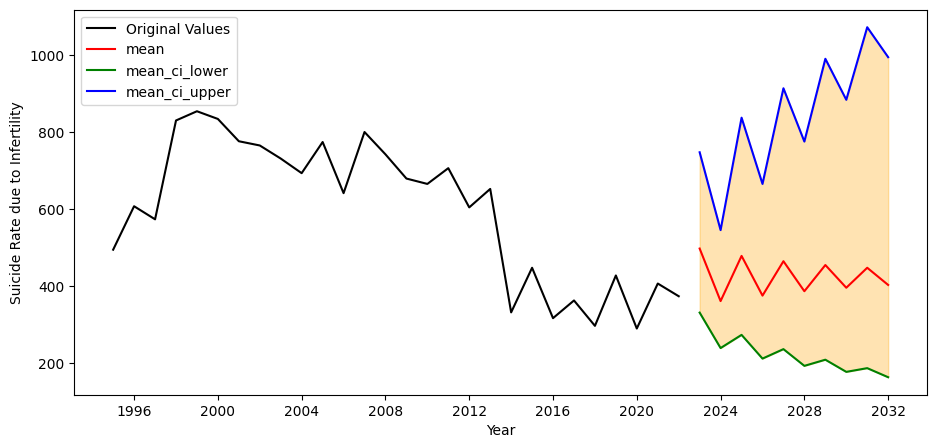

In [125]:
plt.figure(figsize=(11,5))
plt.plot(infertility['Infertility'],color='black')
plt.plot(inf_forecasted_exp['mean'],color='red')
plt.plot(inf_forecasted_exp['mean_ci_lower'],color='green')
plt.plot(inf_forecasted_exp['mean_ci_upper'],color='blue')
plt.legend(['Original Values','mean','mean_ci_lower','mean_ci_upper'],loc="best")
plt.fill_between(inf_forecasted_exp.index,inf_forecasted_exp['mean_ci_lower'],inf_forecasted_exp['mean_ci_upper'],color='orange',alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Suicide Rate due to Infertility')
plt.show()

# code for illness dataset

In [126]:
illness.head()

Year  Illness
0 1964-01-01      NaN
1 1965-01-01      NaN
2 1966-01-01      NaN
3 1967-01-01      NaN
4 1968-01-01      NaN

# preprocessing the illness dataset

In [127]:
illness.index = pd.to_datetime(illness['Year'])

In [128]:
illness.drop('Year',axis=1,inplace=True)

/tmp/ipykernel_18/2700274386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  illness.drop('Year',axis=1,inplace=True)


In [129]:
illness.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 1964-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Illness  28 non-null     float64
dtypes: float64(1)
memory usage: 944.0 bytes


In [130]:
illness.dropna(inplace=True)

/tmp/ipykernel_18/324782349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  illness.dropna(inplace=True)


In [131]:
illness.drop_duplicates(inplace=True)

/tmp/ipykernel_18/4287692794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  illness.drop_duplicates(inplace=True)


In [132]:
illness.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 1995-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Illness  28 non-null     float64
dtypes: float64(1)
memory usage: 448.0 bytes


In [133]:
illness.sort_index(inplace=True)

In [134]:
illness.head()

Illness
Year               
1995-01-01  18045.0
1996-01-01  17767.0
1997-01-01  19318.0
1998-01-01  22071.0
1999-01-01  21989.0

In [135]:
illness.describe()

Illness
count     28.00000
mean   24663.50000
std     3294.76282
min    17767.00000
25%    22690.75000
50%    24977.50000
75%    26647.00000
max    31484.00000

# checking stationarity of the illness data

In [136]:
illresult = adfuller(illness)
print("adf statistic : ",illresult[0])
print("p value : ",illresult[1])
print("critical values : ",illresult[4])

adf statistic :  -1.6783036949093901
p value :  0.44232430179417426
critical values :  {'1%': -3.7529275211638033, '5%': -2.998499866852963, '10%': -2.6389669754253307}


## applying the log and differencing transformations

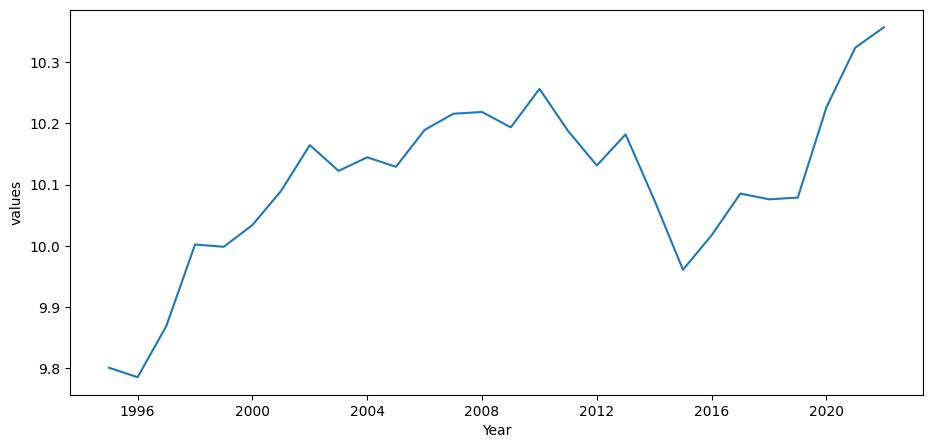

In [137]:
plt.figure(figsize=(11,5))
fig = plt.figure(1)
ill_log = np.log(illness)
plt.plot(ill_log)
plt.xlabel('Year')
plt.ylabel('values')
plt.show()

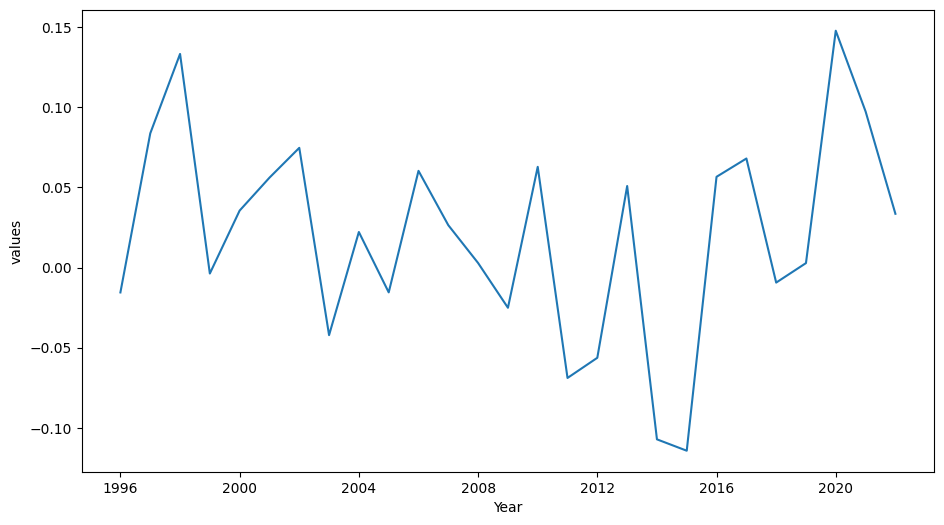

In [138]:
plt.figure(figsize=(11,6))
fig = plt.figure(1)

ill_log_diff = ill_log - ill_log.shift()
plt.plot(ill_log_diff)

plt.xlabel('Year')
plt.ylabel('values')
plt.show()

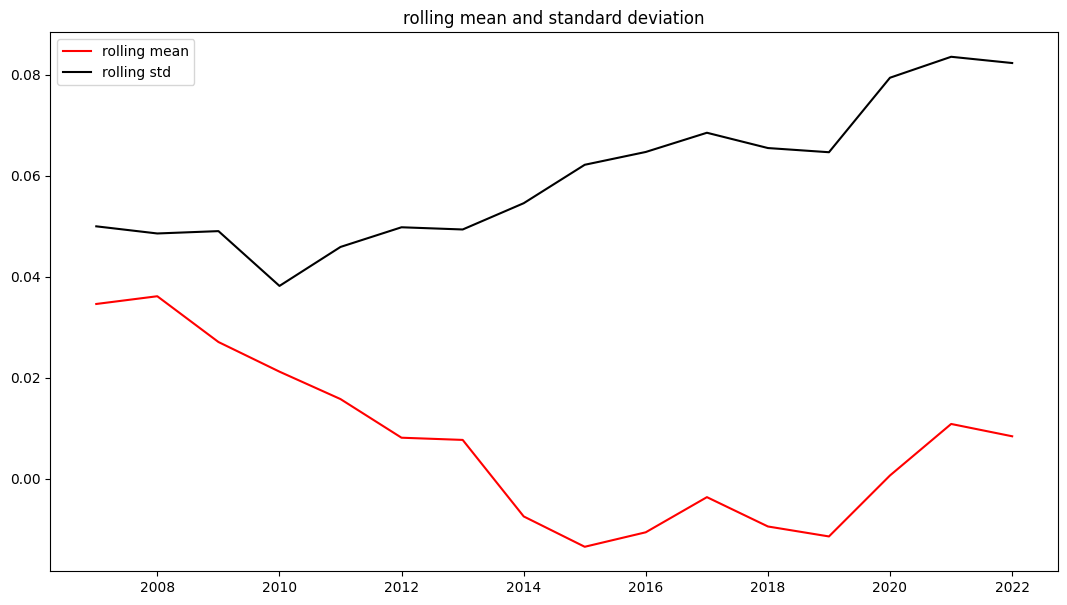

In [139]:
rollmean = ill_log_diff.rolling(12).mean() 
rollstd = ill_log_diff.rolling(12).std()

plt.figure(figsize=(13,7))
mean = plt.plot(rollmean,label = 'rolling mean',color='red')
std = plt.plot(rollstd , label='rolling std',color='black')
plt.legend(loc='best')
plt.title('rolling mean and standard deviation')
plt.show(block=False)

In [140]:
ill_log_diff.dropna(inplace=True)

## confirming the stationarity after transformatinos

In [141]:
illresult2 = adfuller(ill_log_diff)
print("adf statistic : ",illresult2[0])
print("p value : ",illresult2[1])
print("critical values : ",illresult2[4])

adf statistic :  -1.732458167323849
p value :  0.4144713850818722
critical values :  {'1%': -3.7377092158564813, '5%': -2.9922162731481485, '10%': -2.635746736111111}


In [142]:
log_acf_ill = acf(ill_log_diff,nlags=8)
log_pacf_ill = pacf(ill_log_diff,nlags=8)

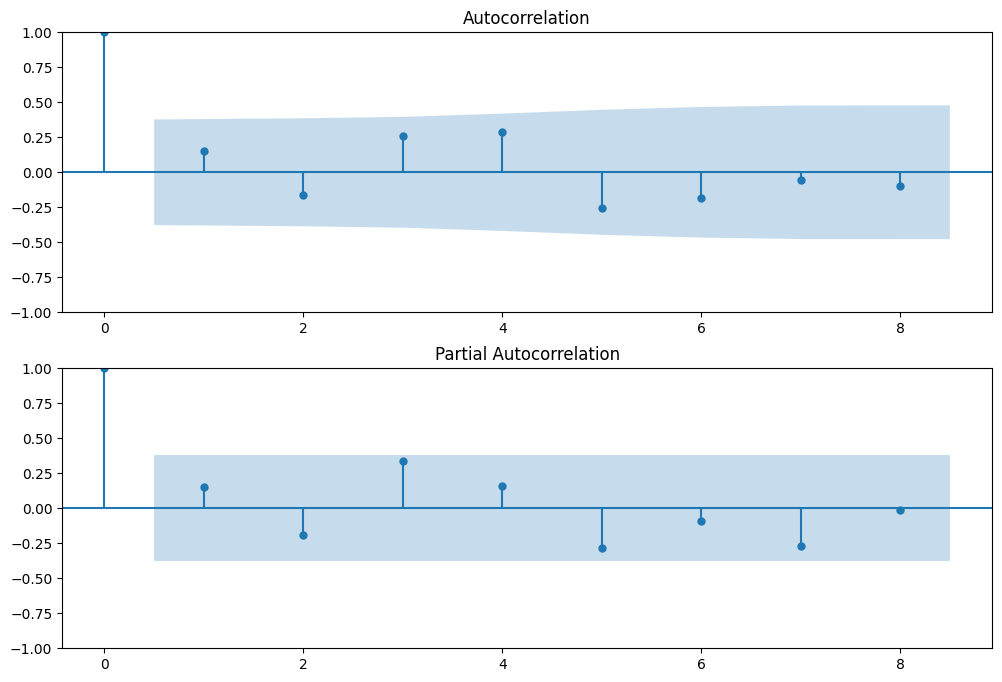

In [143]:
# selecting the ar and ma terms

import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ill_log_diff.dropna(),lags=8,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ill_log_diff.dropna(),lags=8,ax=ax2)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


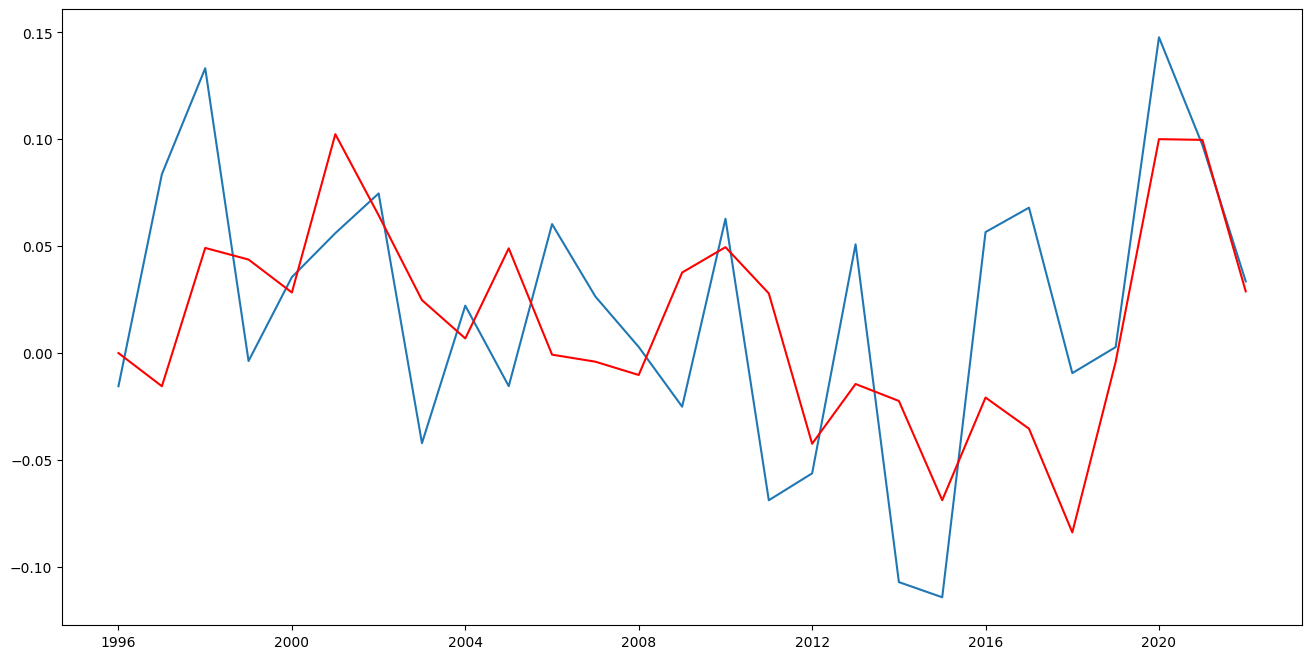

In [144]:
plt.figure(figsize=(16,8))
model = ARIMA(ill_log_diff,order=(2,1,2))
ill_result = model.fit()
plt.plot(ill_log_diff)
plt.plot(ill_result.fittedvalues,color='red')

In [145]:
arimamodel(ill_log)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-52.719, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-53.275, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-61.304, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.42 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-59.308, Time=0.05 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.922 seconds


ARIMA(order=(0, 2, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


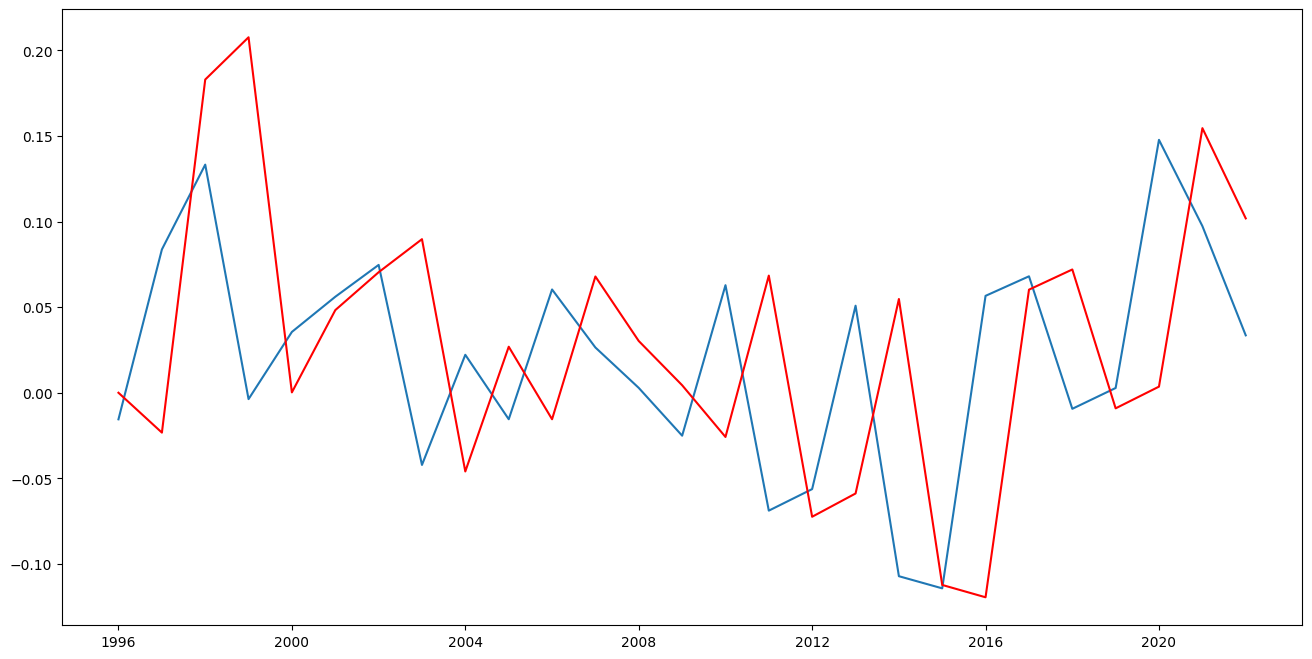

In [146]:
plt.figure(figsize=(16,8))
modelill = ARIMA(ill_log_diff,order=(0,2,1))
ill_result= modelill.fit()
plt.plot(ill_log_diff)
plt.plot(ill_result.fittedvalues,color='red')

In [147]:
print(ill_result.summary())

                               SARIMAX Results                                
Dep. Variable:                Illness   No. Observations:                   27
Model:                 ARIMA(0, 2, 1)   Log Likelihood                  24.193
Date:                Mon, 05 Aug 2024   AIC                            -44.386
Time:                        15:49:40   BIC                            -41.948
Sample:                    01-01-1996   HQIC                           -43.710
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9949      5.460     -0.182      0.855     -11.697       9.707
sigma2         0.0074      0.040      0.185      0.853      -0.071       0.086
Ljung-Box (L1) (Q):                   2.00   Jarque-

In [148]:
# Get the forecast, lower, and upper interval
ill_final_results = ill_result.get_forecast(steps=10, alpha=0.05).summary_frame()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [149]:
ill_final_results

Illness         mean   mean_se  mean_ci_lower  mean_ci_upper
2023-01-01  0.035411  0.087744      -0.136564       0.207386
2024-01-01  0.037297  0.126380      -0.210402       0.284997
2025-01-01  0.039184  0.157540      -0.269589       0.347957
2026-01-01  0.041070  0.185042      -0.321606       0.403746
2027-01-01  0.042956  0.210326      -0.369276       0.455188
2028-01-01  0.044843  0.234114      -0.414012       0.503697
2029-01-01  0.046729  0.256821      -0.456631       0.550089
2030-01-01  0.048615  0.278713      -0.497652       0.594882
2031-01-01  0.050501  0.299969      -0.537427       0.638429
2032-01-01  0.052388  0.320716      -0.576204       0.680979

In [150]:
last_log_ill = ill_log.iloc[-1]
last_log_ill

Illness    10.357235
Name: 2022-01-01 00:00:00, dtype: float64

In [151]:
ill_forecasted = ill_final_results.copy()
ill_forecasted

Illness         mean   mean_se  mean_ci_lower  mean_ci_upper
2023-01-01  0.035411  0.087744      -0.136564       0.207386
2024-01-01  0.037297  0.126380      -0.210402       0.284997
2025-01-01  0.039184  0.157540      -0.269589       0.347957
2026-01-01  0.041070  0.185042      -0.321606       0.403746
2027-01-01  0.042956  0.210326      -0.369276       0.455188
2028-01-01  0.044843  0.234114      -0.414012       0.503697
2029-01-01  0.046729  0.256821      -0.456631       0.550089
2030-01-01  0.048615  0.278713      -0.497652       0.594882
2031-01-01  0.050501  0.299969      -0.537427       0.638429
2032-01-01  0.052388  0.320716      -0.576204       0.680979

In [152]:
ill_forecasted.iloc[:,0:] += 10.357235
ill_forecasted

Illness          mean    mean_se  mean_ci_lower  mean_ci_upper
2023-01-01  10.392646  10.444979      10.220671      10.564621
2024-01-01  10.394532  10.483615      10.146833      10.642232
2025-01-01  10.396419  10.514775      10.087646      10.705192
2026-01-01  10.398305  10.542277      10.035629      10.760981
2027-01-01  10.400191  10.567561       9.987959      10.812423
2028-01-01  10.402078  10.591349       9.943223      10.860932
2029-01-01  10.403964  10.614056       9.900604      10.907324
2030-01-01  10.405850  10.635948       9.859583      10.952117
2031-01-01  10.407736  10.657204       9.819808      10.995664
2032-01-01  10.409623  10.677951       9.781031      11.038214

## applying exponentiation operation to reverse the log operation

In [153]:
# Exponentiate to reverse log transformation
ill_forecasted_exp = np.exp(ill_forecasted)
ill_forecasted_exp

Illness             mean       mean_se  mean_ci_lower  mean_ci_upper
2023-01-01  32618.866955  34371.357848   27465.097737   38739.730388
2024-01-01  32680.453444  35725.309544   25510.178993   41866.113037
2025-01-01  32742.156212  36856.050808   24044.121427   44586.731799
2026-01-01  32803.975479  37883.729674   22825.402278   47144.878067
2027-01-01  32865.911465  38853.809153   21762.837831   49633.606830
2028-01-01  32927.964389  39789.115540   20810.713099   52100.609608
2029-01-01  32990.134474  40702.952435   19942.414131   54574.584876
2030-01-01  33052.421940  41603.845909   19140.903982   57074.764969
2031-01-01  33114.827008  42497.639038   18394.525274   59615.116532
2032-01-01  33177.349901  43388.544234   17694.894223   62206.449644

In [154]:
ill_forecasted_exp.to_csv('illness_forecast95ci.csv')

## graph representing the initial vlaues of illness and its forecasted mean and CI vlaues

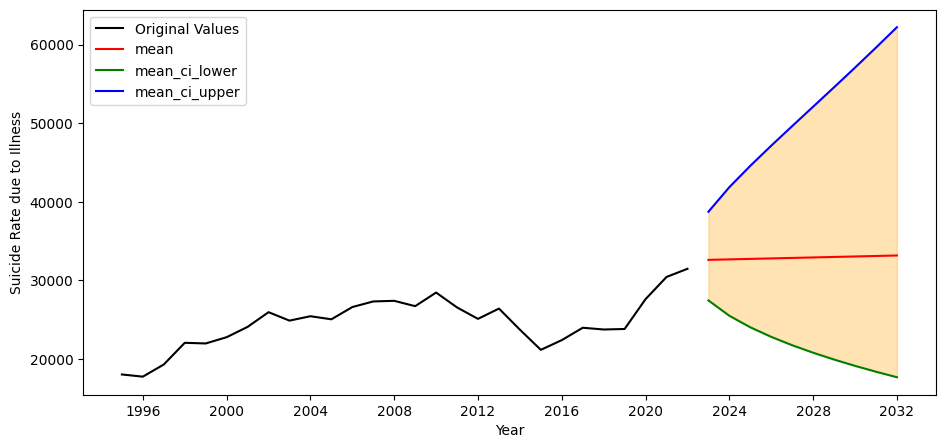

In [155]:
plt.figure(figsize=(11,5))
plt.plot(illness['Illness'],color='black')
plt.plot(ill_forecasted_exp['mean'],color='red')
plt.plot(ill_forecasted_exp['mean_ci_lower'],color='green')
plt.plot(ill_forecasted_exp['mean_ci_upper'],color='blue')
plt.legend(['Original Values','mean','mean_ci_lower','mean_ci_upper'],loc="best")
plt.fill_between(ill_forecasted_exp.index,ill_forecasted_exp['mean_ci_lower'],ill_forecasted_exp['mean_ci_upper'],color='orange',alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Suicide Rate due to Illness')
plt.show()

# code for drug addiction

In [156]:
drugs.head()

Year  Addiction
0 1964-01-01        NaN
1 1965-01-01        NaN
2 1966-01-01        NaN
3 1967-01-01        NaN
4 1968-01-01        NaN

In [157]:
drugs.index = pd.to_datetime(drugs['Year'])

# preprocessing drugs dataset

In [158]:
drugs.drop('Year',axis=1,inplace=True)

/tmp/ipykernel_18/839430435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs.drop('Year',axis=1,inplace=True)


In [159]:
drugs.dropna(inplace=True)

/tmp/ipykernel_18/568036649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs.dropna(inplace=True)


In [160]:
drugs.drop_duplicates(inplace=True)

/tmp/ipykernel_18/94586356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs.drop_duplicates(inplace=True)


In [161]:
drugs.sort_index(inplace=True)

In [162]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 1995-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Addiction  28 non-null     float64
dtypes: float64(1)
memory usage: 448.0 bytes


In [163]:
drugs.describe()

Addiction
count     28.000000
mean    3820.535714
std     3019.449625
min      745.000000
25%     1635.250000
50%     2836.000000
75%     4743.000000
max    11634.000000

# checking for stationarity initial

In [164]:
drugsresult = adfuller(drugs)
print("adf statistic : ",drugsresult[0])
print("p value : ",drugsresult[1])
print("critical values : ",drugsresult[4])

adf statistic :  2.890084586729238
p value :  1.0
critical values :  {'1%': -3.859073285322359, '5%': -3.0420456927297668, '10%': -2.6609064197530863}


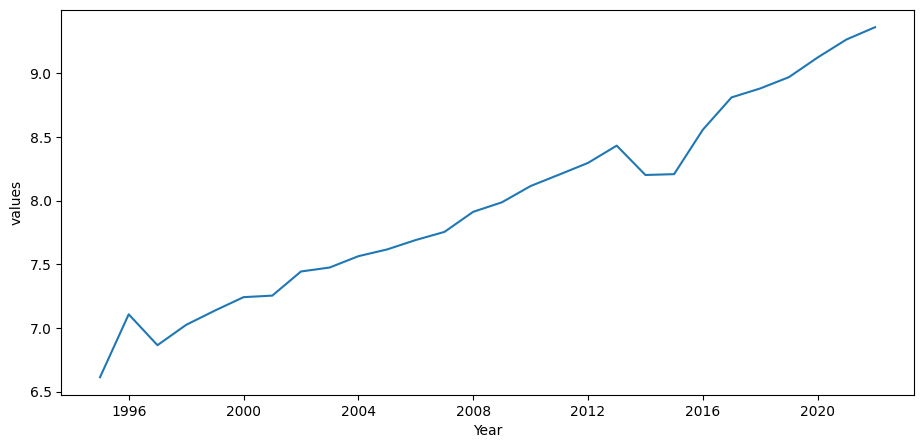

In [165]:
plt.figure(figsize=(11,5))
fig = plt.figure(1)
drugs_log = np.log(drugs)
plt.plot(drugs_log)
plt.xlabel('Year')
plt.ylabel('values')
plt.show()

## applying log and diffrencing operations

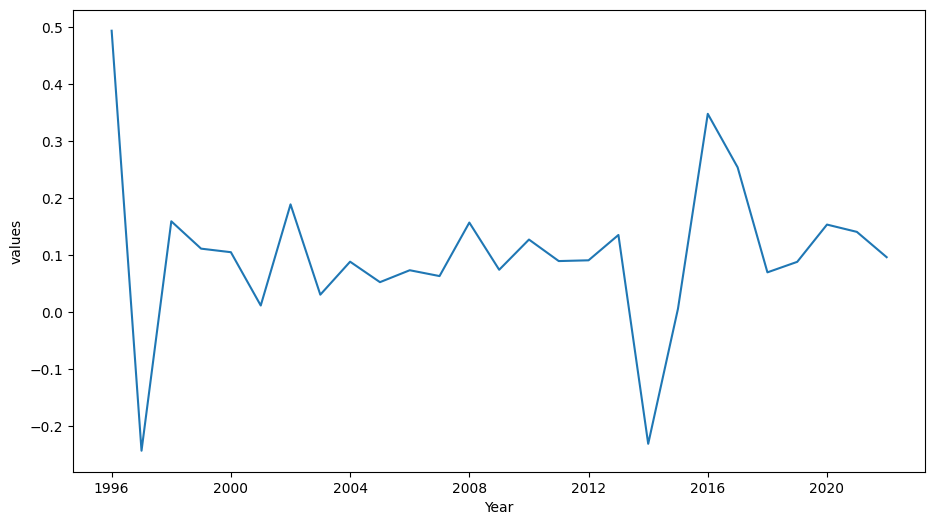

In [166]:
plt.figure(figsize=(11,6))
fig = plt.figure(1)

drugs_log_diff = drugs_log - drugs_log.shift()
plt.plot(drugs_log_diff)
plt.xlabel('Year')
plt.ylabel('values')
plt.show()

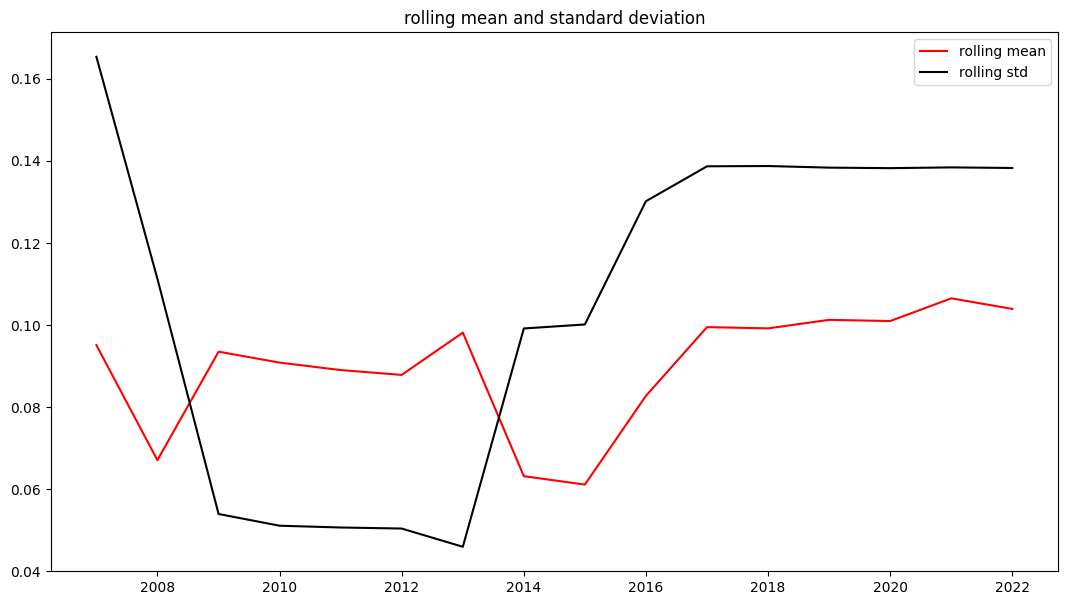

In [167]:
rollmean = drugs_log_diff.rolling(12).mean() 
rollstd = drugs_log_diff.rolling(12).std()

plt.figure(figsize=(13,7))
mean = plt.plot(rollmean,label = 'rolling mean',color='red')
std = plt.plot(rollstd , label='rolling std',color='black')
plt.legend(loc='best')
plt.title('rolling mean and standard deviation')
plt.show(block=False)

In [168]:
drugs_log_diff.dropna(inplace=True)

## confirming stationarity after transformations

In [169]:
drugsresult2 = adfuller(drugs_log_diff)
print("adf statistic : ",drugsresult2[0])
print("p value : ",drugsresult2[1])
print("critical values : ",drugsresult2[4])

adf statistic :  -3.478978989977407
p value :  0.008543657876131686
critical values :  {'1%': -3.889265672705068, '5%': -3.0543579727254224, '10%': -2.66698384083045}


## the p values is less than 0.05

# selecting the AR nad MA terms for the drugs data

In [170]:
log_acf_drugs = acf(drugs_log_diff,nlags=8)
log_pacf_drugs = pacf(drugs_log_diff,nlags=8)

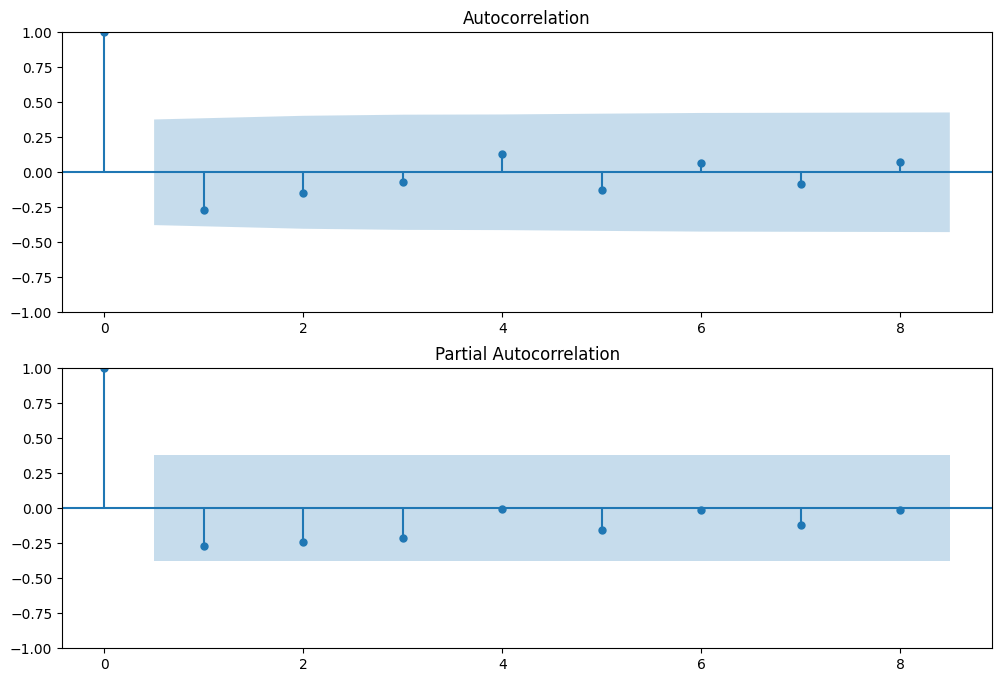

In [171]:
# selecting the ar and ma terms

import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(drugs_log_diff.dropna(),lags=8,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(drugs_log_diff.dropna(),lags=8,ax=ax2)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


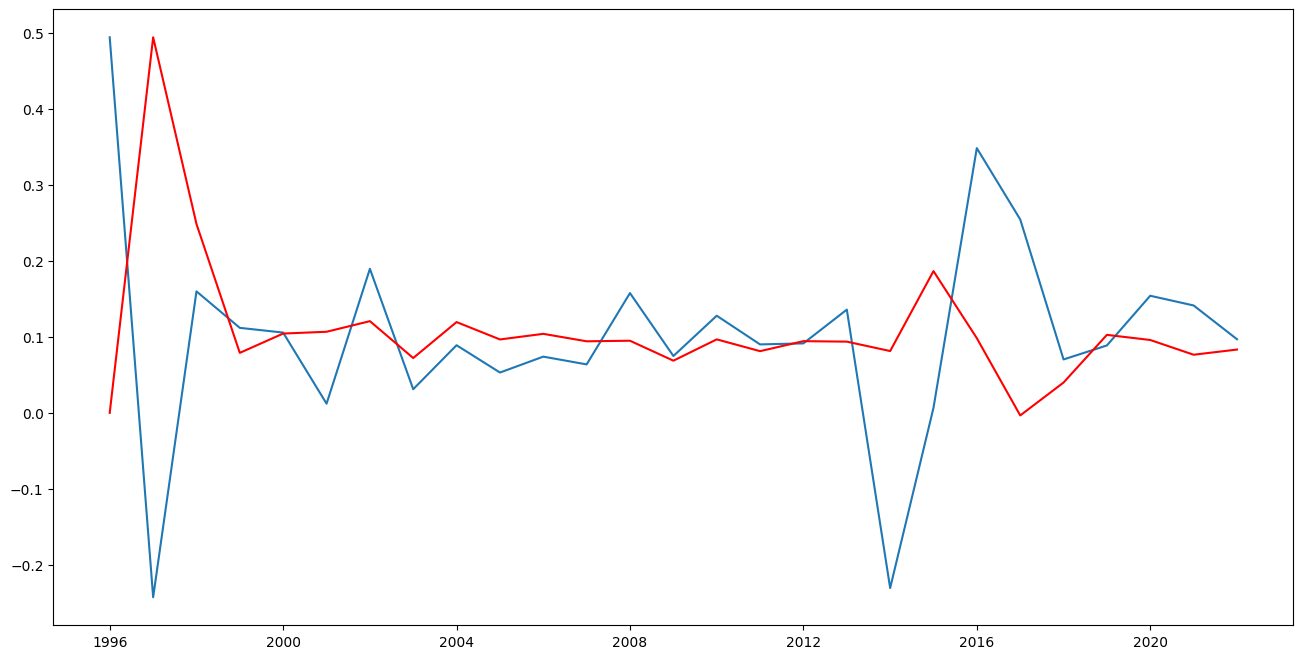

In [172]:
plt.figure(figsize=(16,8))
model = ARIMA(drugs_log_diff,order=(1,1,1))
drugs_result = model.fit()
plt.plot(drugs_log_diff)
plt.plot(drugs_result.fittedvalues,color='red')

# creating the drugs tuned model

In [173]:
arimamodel(drugs_log)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-24.161, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-26.212, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-27.027, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-29.408, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-16.523, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-27.567, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-14.861, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.038 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


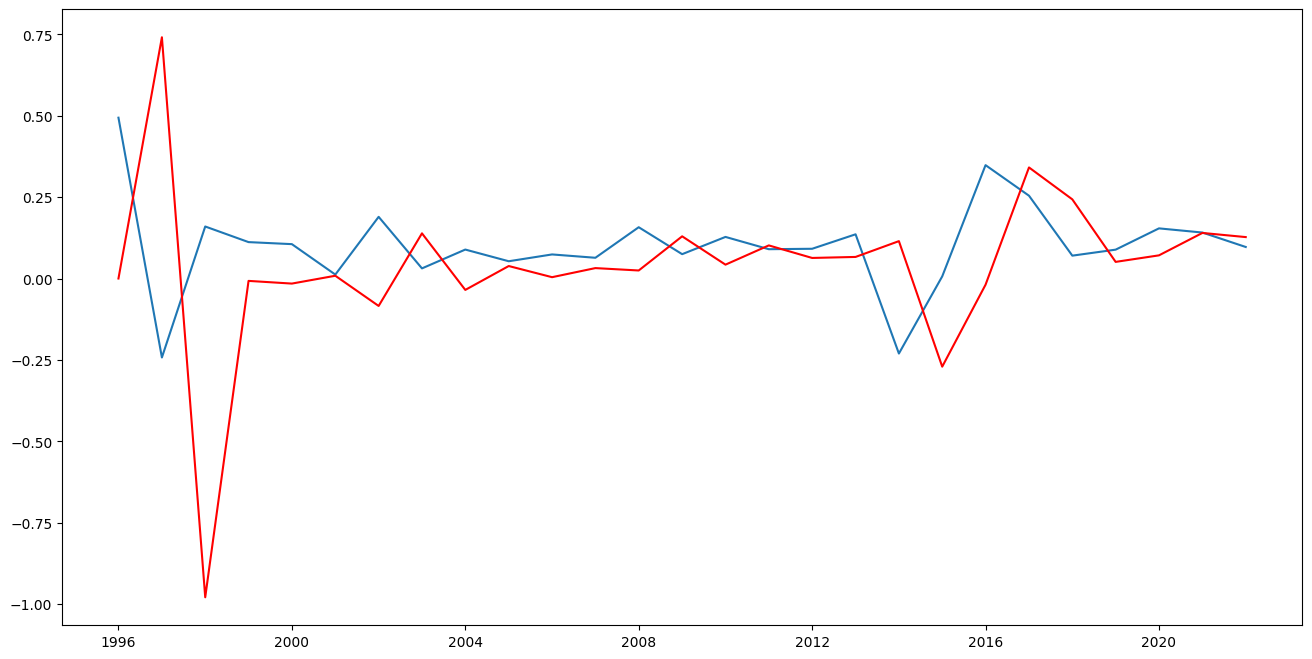

In [174]:
plt.figure(figsize=(16,8))
modeldrugs = ARIMA(drugs_log_diff,order=(0,2,1))
drugs_result= modeldrugs.fit()
plt.plot(drugs_log_diff)
plt.plot(drugs_result.fittedvalues,color='red')

## final tuned model

In [175]:
print(drugs_result.summary())

                               SARIMAX Results                                
Dep. Variable:              Addiction   No. Observations:                   27
Model:                 ARIMA(0, 2, 1)   Log Likelihood                   1.387
Date:                Mon, 05 Aug 2024   AIC                              1.226
Time:                        15:49:53   BIC                              3.663
Sample:                    01-01-1996   HQIC                             1.902
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9917      2.791     -0.355      0.722      -6.461       4.478
sigma2         0.0464      0.129      0.361      0.718      -0.206       0.299
Ljung-Box (L1) (Q):                   0.09   Jarque-

# forecasting the drugs values for the next 10 years

In [176]:
# Get the forecast, lower, and upper interval
drugs_final_results = drugs_result.get_forecast(steps=10, alpha=0.05).summary_frame()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [177]:
drugs_final_results

Addiction       mean   mean_se  mean_ci_lower  mean_ci_upper
2023-01-01  0.081696  0.218723      -0.346993       0.510384
2024-01-01  0.066533  0.315092      -0.551036       0.684101
2025-01-01  0.051370  0.392856      -0.718614       0.821353
2026-01-01  0.036207  0.461525      -0.868366       0.940779
2027-01-01  0.021044  0.524688      -1.007326       1.049414
2028-01-01  0.005881  0.584140      -1.139012       1.150774
2029-01-01 -0.009282  0.640919      -1.265460       1.246895
2030-01-01 -0.024445  0.695684      -1.387961       1.339071
2031-01-01 -0.039608  0.748882      -1.507390       1.428174
2032-01-01 -0.054771  0.800829      -1.624368       1.514825

## last log value to reverse the differencing operation

In [178]:
last_log_drugs = drugs_log.iloc[-1]
last_log_drugs

Addiction    9.361687
Name: 2022-01-01 00:00:00, dtype: float64

In [179]:
drugs_forecasted = drugs_final_results.copy()
drugs_forecasted

Addiction       mean   mean_se  mean_ci_lower  mean_ci_upper
2023-01-01  0.081696  0.218723      -0.346993       0.510384
2024-01-01  0.066533  0.315092      -0.551036       0.684101
2025-01-01  0.051370  0.392856      -0.718614       0.821353
2026-01-01  0.036207  0.461525      -0.868366       0.940779
2027-01-01  0.021044  0.524688      -1.007326       1.049414
2028-01-01  0.005881  0.584140      -1.139012       1.150774
2029-01-01 -0.009282  0.640919      -1.265460       1.246895
2030-01-01 -0.024445  0.695684      -1.387961       1.339071
2031-01-01 -0.039608  0.748882      -1.507390       1.428174
2032-01-01 -0.054771  0.800829      -1.624368       1.514825

## adding the last_log value of the drugs log transformned data to reverse the differencing operation

In [180]:
drugs_forecasted.iloc[:,0:] += 9.361687
drugs_forecasted

Addiction       mean    mean_se  mean_ci_lower  mean_ci_upper
2023-01-01  9.443383   9.580410       9.014694       9.872071
2024-01-01  9.428220   9.676779       8.810651      10.045788
2025-01-01  9.413057   9.754543       8.643073      10.183040
2026-01-01  9.397894   9.823212       8.493321      10.302466
2027-01-01  9.382731   9.886375       8.354361      10.411101
2028-01-01  9.367568   9.945827       8.222675      10.512461
2029-01-01  9.352405  10.002606       8.096227      10.608582
2030-01-01  9.337242  10.057371       7.973726      10.700758
2031-01-01  9.322079  10.110569       7.854297      10.789861
2032-01-01  9.306916  10.162516       7.737319      10.876512

# final drugs forecasted transformed values

## after perfomeing exponentiation operation to reverse the log transformaiton

In [181]:
drugs_forecasted_exp = np.exp(drugs_forecasted)
drugs_forecasted_exp

Addiction           mean       mean_se  mean_ci_lower  mean_ci_upper
2023-01-01  12624.347873  14478.348794    8223.030794   19381.437721
2024-01-01  12434.369250  15943.055331    6705.285815   23058.456107
2025-01-01  12247.249537  17232.337875    5670.729449   26450.763093
2026-01-01  12062.945711  18457.241302    4882.053500   29806.035358
2027-01-01  11881.415398  19660.665628    4248.667375   33226.425941
2028-01-01  11702.616861  20864.968897    3724.450446   36770.858784
2029-01-01  11526.508989  22083.935460    3282.062061   40480.773059
2030-01-01  11353.051292  23327.100575    2903.656502   44389.470148
2031-01-01  11182.203888  24601.658374    2576.782600   48526.283830
2032-01-01  11013.927497  25913.421186    2292.319095   52918.722857

In [182]:
drugs_forecasted_exp.to_csv('drugs95ci.csv')

## graph representing the initial drugs data and its forecasted mean and CI values

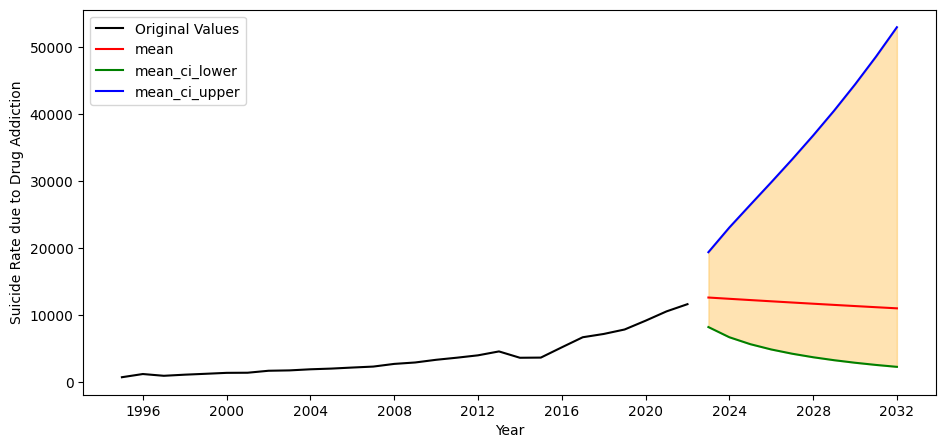

In [183]:
plt.figure(figsize=(11,5))
plt.plot(drugs['Addiction'],color='black')
plt.plot(drugs_forecasted_exp['mean'],color='red')
plt.plot(drugs_forecasted_exp['mean_ci_lower'],color='green')
plt.plot(drugs_forecasted_exp['mean_ci_upper'],color='blue')
plt.legend(['Original Values','mean','mean_ci_lower','mean_ci_upper'],loc="best")
plt.fill_between(drugs_forecasted_exp.index,drugs_forecasted_exp['mean_ci_lower'],drugs_forecasted_exp['mean_ci_upper'],color='orange',alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Suicide Rate due to Drug Addiction')
plt.show()

# extra graphs 

In [184]:
cols = ds[['Year','Infertility','Illness','Addiction']]

In [185]:
cols.head()

Year  Infertility  Illness  Addiction
0 1964-01-01          NaN      NaN        NaN
1 1965-01-01          NaN      NaN        NaN
2 1966-01-01          NaN      NaN        NaN
3 1967-01-01          NaN      NaN        NaN
4 1968-01-01          NaN      NaN        NaN

In [186]:
cols.index = pd.to_datetime(cols['Year'])

In [187]:
cols.drop('Year',axis=1,inplace=True)

/tmp/ipykernel_18/222377355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cols.drop('Year',axis=1,inplace=True)


In [188]:
cols.isnull().sum()

Infertility    31
Illness        31
Addiction      31
dtype: int64

In [189]:
cols.dropna(inplace=True)

/tmp/ipykernel_18/3993719087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cols.dropna(inplace=True)


In [190]:
cols.duplicated().sum()

0

In [191]:
cols.sort_index(inplace=True)

In [192]:
cols.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 1995-01-01 to 2022-01-01
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Infertility  28 non-null     float64
 1   Illness      28 non-null     float64
 2   Addiction    28 non-null     float64
dtypes: float64(3)
memory usage: 896.0 bytes


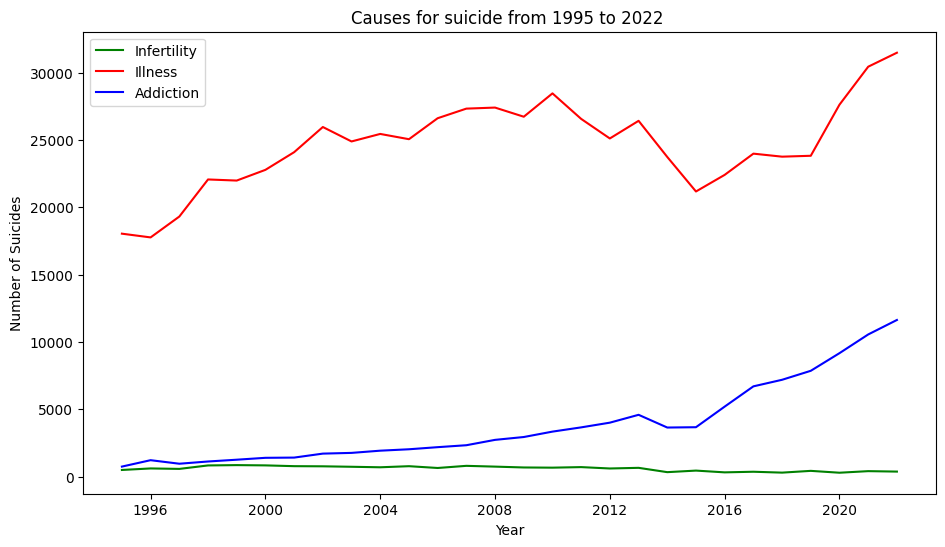

In [193]:
plt.figure(figsize=(11,6))
plt.plot(cols['Infertility'],color='green')
plt.plot(cols['Illness'],color='red')
plt.plot(cols['Addiction'],color='blue')
plt.title('Causes for suicide from 1995 to 2022 ')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.legend(['Infertility','Illness','Addiction'],loc='best')
plt.show()

# 3 seperate graphs from 2023 to 2032 95% CI

## due to drug addiction

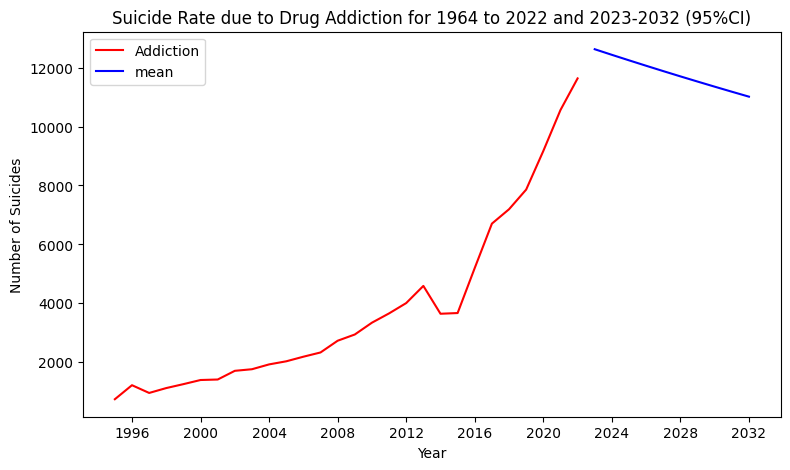

In [194]:
plt.figure(figsize=(9,5))
plt.plot(drugs['Addiction'],color='red')
plt.plot(drugs_forecasted_exp['mean'],color='blue')
plt.title('Suicide Rate due to Drug Addiction for 1964 to 2022 and 2023-2032 (95%CI)')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.legend(['Addiction','mean'],loc = 'best')
plt.show()

## due to illness

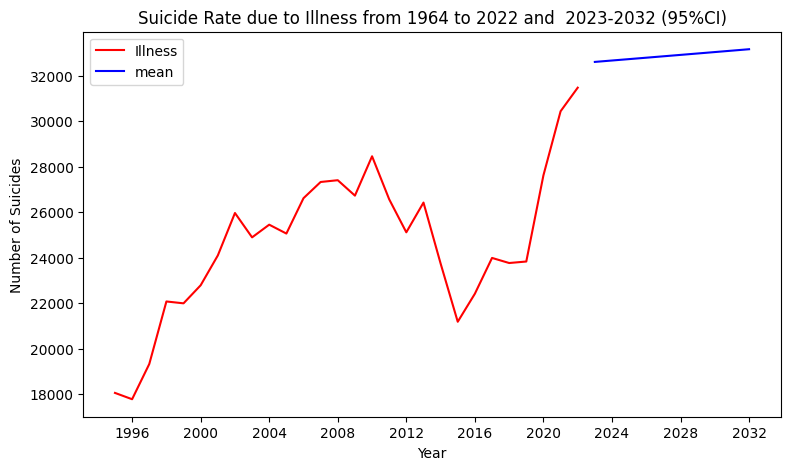

In [195]:
plt.figure(figsize=(9,5))
plt.plot(illness['Illness'],color='red')
plt.plot(ill_forecasted_exp['mean'],color='blue')
plt.title('Suicide Rate due to Illness from 1964 to 2022 and  2023-2032 (95%CI)')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.legend(['Illness','mean'],loc='best')
plt.show()

## due to infertility

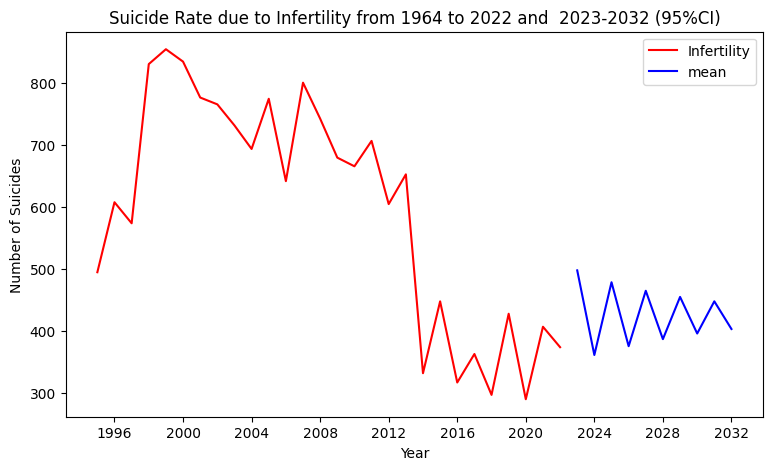

In [196]:
plt.figure(figsize=(9,5))
plt.plot(infertility['Infertility'],color='red')
plt.plot(inf_forecasted_exp['mean'],color='blue')
plt.title('Suicide Rate due to Infertility from 1964 to 2022 and  2023-2032 (95%CI)')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.legend(['Infertility','mean'],loc='best')
plt.show()

# ====================================================================================

# infertility male and female models

In [197]:
inf_male = ds[['Year','A_male']]
inf_female = ds[['Year','A_female']]

# infertile male model

In [198]:
inf_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    59 non-null     datetime64[ns]
 1   A_male  28 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 KB


In [199]:
inf_male.dropna(inplace=True)

/tmp/ipykernel_18/443120312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inf_male.dropna(inplace=True)


In [200]:
inf_male.duplicated().sum()

0

In [201]:
inf_male.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 31 to 58
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    28 non-null     datetime64[ns]
 1   A_male  28 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 672.0 bytes


In [202]:
inf_male.head()

Year  A_male
31 1995-01-01   599.0
32 1996-01-01  1022.0
33 1997-01-01   863.0
34 1998-01-01  1015.0
35 1999-01-01  1194.0

In [203]:
inf_male.index = pd.to_datetime(inf_male['Year'])

In [204]:
inf_male.drop('Year',axis=1,inplace=True)

/tmp/ipykernel_18/4173057240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inf_male.drop('Year',axis=1,inplace=True)


In [205]:
inf_male.sort_index(inplace=True)

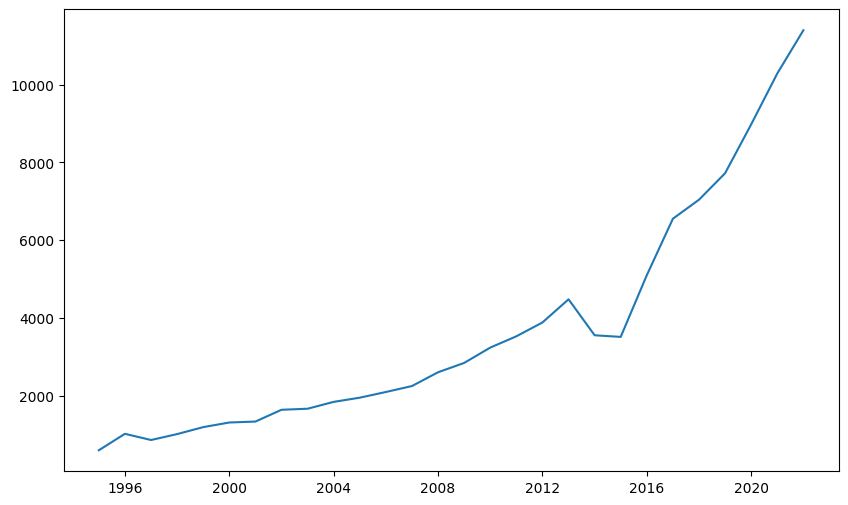

In [206]:
plt.figure(figsize=(10,6))
plt.plot(inf_male)
plt.show()

## here we can observe trends in the data so we need to make it stationary

In [207]:
 sta_test = adfuller(inf_male)
print("adf statistic : ",sta_test[0])
print("p value : ",sta_test[1])
print("critical values : ",sta_test[4])

adf statistic :  2.636412193910588
p value :  0.9990810056387496
critical values :  {'1%': -3.859073285322359, '5%': -3.0420456927297668, '10%': -2.6609064197530863}


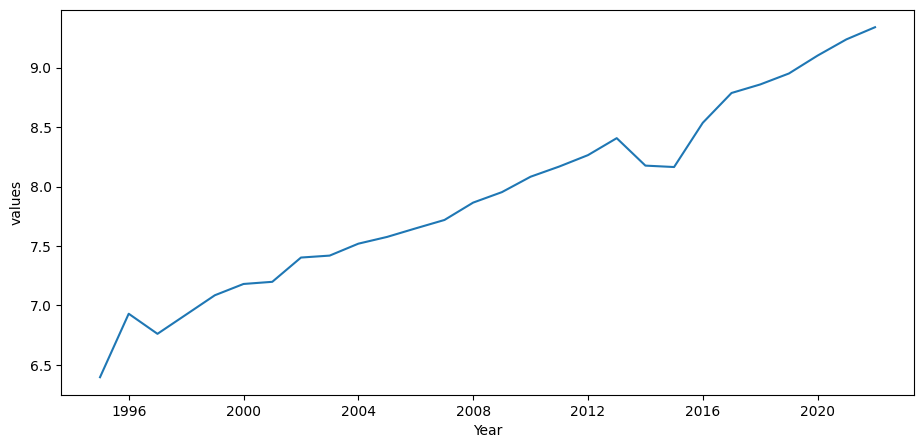

In [208]:
plt.figure(figsize=(11,5))
fig = plt.figure(1)
inf_male_log = np.log(inf_male)
plt.plot(inf_male_log)
plt.xlabel('Year')
plt.ylabel('values')
plt.show()

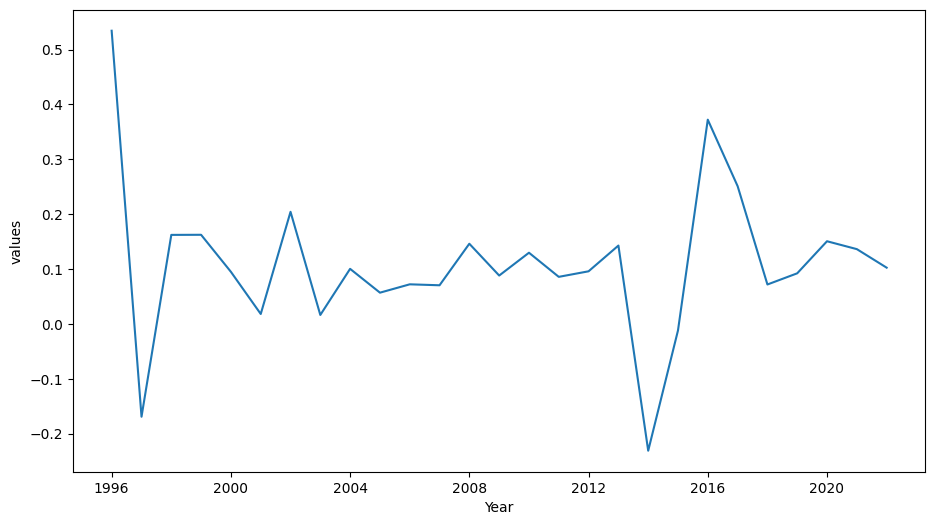

In [209]:
plt.figure(figsize=(11,6))
fig = plt.figure(1)

inf_male_log_diff = inf_male_log - inf_male_log.shift()
plt.plot(inf_male_log_diff)
plt.xlabel('Year')
plt.ylabel('values')
plt.show()

In [210]:
inf_male_log_diff.dropna(inplace=True)

In [211]:
sta_test2 = adfuller(inf_male_log_diff)
print("adf statistic : ",sta_test2[0])
print("p value : ",sta_test2[1])
print("critical values : ",sta_test2[4])

adf statistic :  -4.7533727097150535
p value :  6.672858719105865e-05
critical values :  {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}


In [212]:
log_acf = acf(inf_male_log_diff,nlags=8)
log_pacf = pacf(inf_male_log_diff,nlags=8)

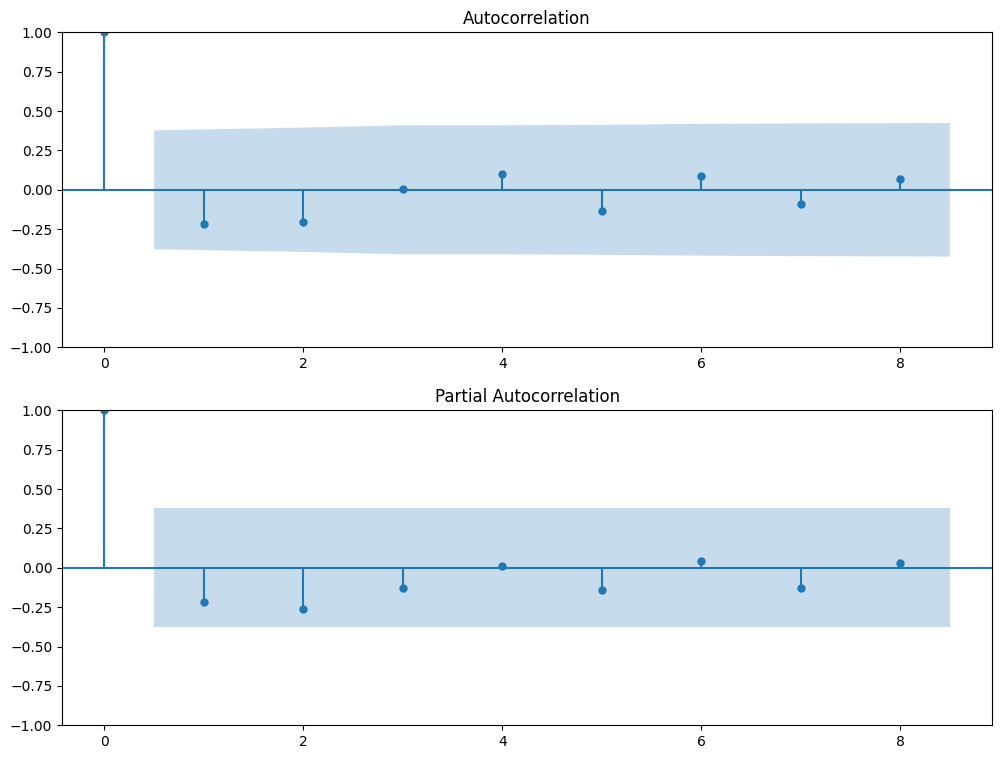

In [213]:
# selecting the ar and ma terms

import statsmodels.api as sm

fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(inf_male_log_diff.dropna(),lags=8,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(inf_male_log_diff.dropna(),lags=8,ax=ax2)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


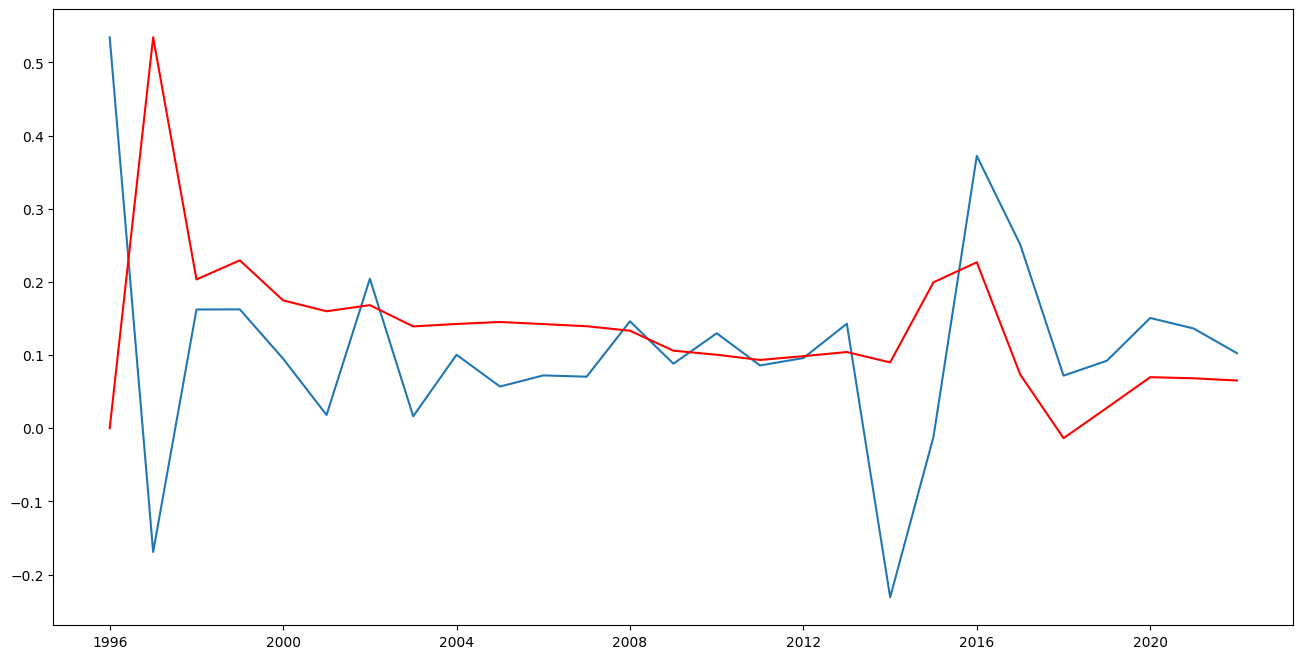

In [214]:
plt.figure(figsize=(16,8))
model = ARIMA(inf_male_log_diff,order=(2,1,2))
results_arima = model.fit()
plt.plot(inf_male_log_diff)
plt.plot(results_arima.fittedvalues,color='red')

In [215]:
arimamodel(inf_male_log)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-28.697, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-25.837, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-25.831, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-28.206, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-14.915, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-26.638, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-26.036, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-20.027, Time=0.13 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.384 seconds


ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


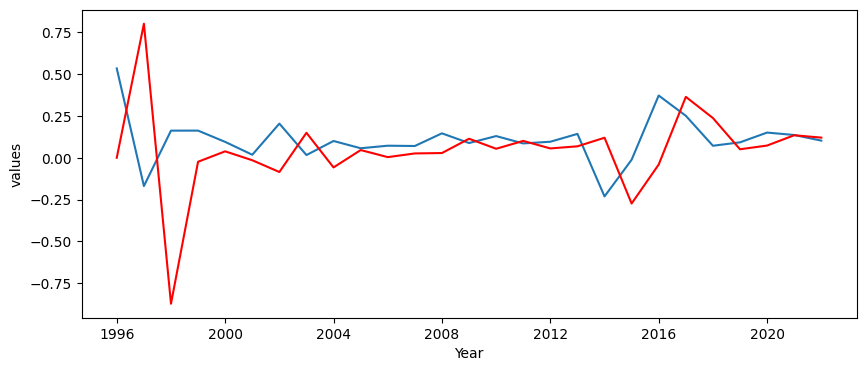

In [216]:
plt.figure(figsize=(10,4))
model = ARIMA(inf_male_log_diff,order=(0,2,1))
results_arima = model.fit()
plt.plot(inf_male_log_diff)
plt.plot(results_arima.fittedvalues,color='red')
plt.xlabel('Year')
plt.ylabel('values')
plt.show()

In [217]:
print(results_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                 A_male   No. Observations:                   27
Model:                 ARIMA(0, 2, 1)   Log Likelihood                   2.064
Date:                Mon, 05 Aug 2024   AIC                             -0.128
Time:                        15:50:12   BIC                              2.310
Sample:                    01-01-1996   HQIC                             0.548
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9941      3.379     -0.294      0.769      -7.618       5.629
sigma2         0.0438      0.147      0.299      0.765      -0.244       0.331
Ljung-Box (L1) (Q):                   0.04   Jarque-

In [218]:
# Get the forecast, lower, and upper interval
final_results = results_arima.get_forecast(steps=10, alpha=0.05).summary_frame()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [219]:
final_results

A_male          mean   mean_se  mean_ci_lower  mean_ci_upper
2023-01-01  0.085954  0.212734      -0.330997       0.502906
2024-01-01  0.069411  0.306418      -0.531157       0.669980
2025-01-01  0.052868  0.381984      -0.695806       0.801542
2026-01-01  0.036325  0.448684      -0.843079       0.915729
2027-01-01  0.019782  0.510012      -0.979823       1.019387
2028-01-01  0.003239  0.567714      -1.109461       1.115938
2029-01-01 -0.013304  0.622802      -1.233974       1.207365
2030-01-01 -0.029848  0.675916      -1.354620       1.294924
2031-01-01 -0.046391  0.727492      -1.472250       1.379468
2032-01-01 -0.062934  0.777838      -1.587468       1.461600

In [220]:
# Get the last observed value from log-transformed data
last_log_value = inf_male_log.iloc[-1]

In [221]:
last_log_value

A_male    9.340842
Name: 2022-01-01 00:00:00, dtype: float64

In [222]:
# Reverse differencing
infm_forecasted_diff = final_results.copy()

infm_forecasted_diff


A_male          mean   mean_se  mean_ci_lower  mean_ci_upper
2023-01-01  0.085954  0.212734      -0.330997       0.502906
2024-01-01  0.069411  0.306418      -0.531157       0.669980
2025-01-01  0.052868  0.381984      -0.695806       0.801542
2026-01-01  0.036325  0.448684      -0.843079       0.915729
2027-01-01  0.019782  0.510012      -0.979823       1.019387
2028-01-01  0.003239  0.567714      -1.109461       1.115938
2029-01-01 -0.013304  0.622802      -1.233974       1.207365
2030-01-01 -0.029848  0.675916      -1.354620       1.294924
2031-01-01 -0.046391  0.727492      -1.472250       1.379468
2032-01-01 -0.062934  0.777838      -1.587468       1.461600

In [223]:
infm_forecasted_diff.iloc[:,0:] += 9.340842
infm_forecasted_diff

A_male          mean    mean_se  mean_ci_lower  mean_ci_upper
2023-01-01  9.426796   9.553576       9.009845       9.843748
2024-01-01  9.410253   9.647260       8.809685      10.010822
2025-01-01  9.393710   9.722826       8.645036      10.142384
2026-01-01  9.377167   9.789526       8.497763      10.256571
2027-01-01  9.360624   9.850854       8.361019      10.360229
2028-01-01  9.344081   9.908556       8.231381      10.456780
2029-01-01  9.327538   9.963644       8.106868      10.548207
2030-01-01  9.310994  10.016758       7.986222      10.635766
2031-01-01  9.294451  10.068334       7.868592      10.720310
2032-01-01  9.277908  10.118680       7.753374      10.802442

In [224]:
# Exponentiate to reverse log transformation
infm_forecasted_exp = np.exp(infm_forecasted_diff)
infm_forecasted_exp

A_male              mean       mean_se  mean_ci_lower  mean_ci_upper
2023-01-01  12416.685619  14095.013497    8183.250935   18840.199694
2024-01-01  12212.964267  15479.319165    6698.807099   22266.127984
2025-01-01  12012.585385  16694.351485    5681.870969   25396.952593
2026-01-01  11815.494131  17845.844455    4903.784907   28469.010002
2027-01-01  11621.636567  18974.553563    4277.048995   31578.416952
2028-01-01  11430.959635  20101.634038    3757.018465   34779.397384
2029-01-01  11243.411152  21240.051732    3317.173175   38109.042758
2030-01-01  11058.939790  22398.706571    2940.169248   41596.295633
2031-01-01  10877.495060  23584.251629    2613.883253   45265.946222
2032-01-01  10699.027306  24802.007474    2329.418370   49140.672529

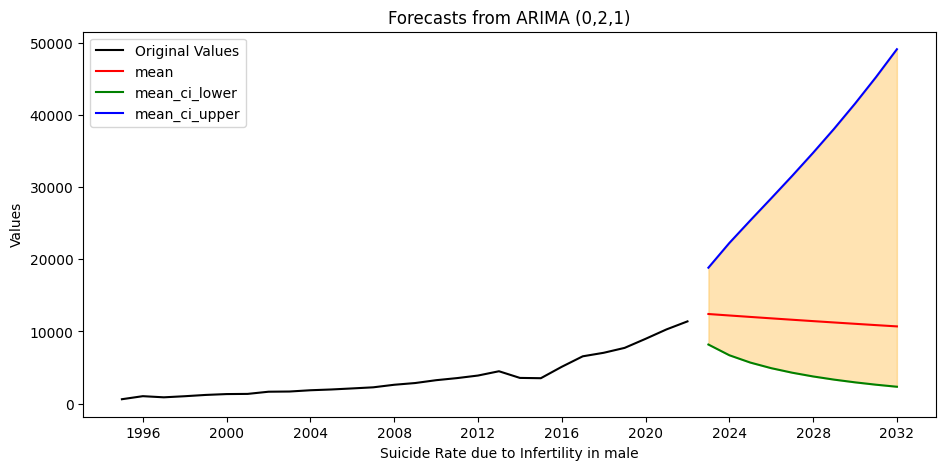

In [225]:
plt.figure(figsize=(11,5))
plt.plot(inf_male['A_male'],color='black')
plt.plot(infm_forecasted_exp['mean'],color='red')
plt.plot(infm_forecasted_exp['mean_ci_lower'],color='green')
plt.plot(infm_forecasted_exp['mean_ci_upper'],color='blue')
plt.legend(['Original Values','mean','mean_ci_lower','mean_ci_upper'],loc="best")
plt.fill_between(infm_forecasted_exp.index,infm_forecasted_exp['mean_ci_lower'],infm_forecasted_exp['mean_ci_upper'],color='orange',alpha=0.3)
plt.xlabel('Suicide Rate due to Infertility in male')
plt.ylabel('Values')
plt.title('Forecasts from ARIMA (0,2,1)')
plt.show()

# female infertility model

In [226]:
inf_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Year      59 non-null     datetime64[ns]
 1   A_female  28 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 KB


In [227]:
inf_female.duplicated().sum()

0

In [228]:
inf_female.index = pd.to_datetime(inf_female['Year'])

In [229]:
inf_female.drop('Year',axis=1,inplace=True)

/tmp/ipykernel_18/3835303504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inf_female.drop('Year',axis=1,inplace=True)


In [230]:
inf_female.sort_index(inplace=True)

In [231]:
inf_female.dropna(inplace=True)

/tmp/ipykernel_18/930516798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inf_female.dropna(inplace=True)


In [232]:
inf_female.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 1995-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   A_female  28 non-null     float64
dtypes: float64(1)
memory usage: 448.0 bytes


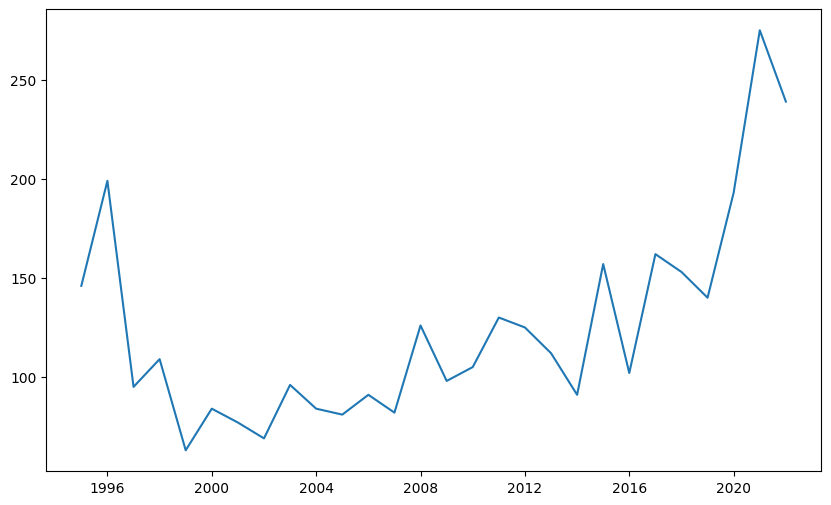

In [233]:
plt.figure(figsize=(10,6))
plt.plot(inf_female)
plt.show()

In [234]:
sta_test = adfuller(inf_female)
print("adf statistic : ",sta_test[0])
print("p value : ",sta_test[1])
print("critical values : ",sta_test[4])

adf statistic :  0.4455459218337408
p value :  0.9831205790685568
critical values :  {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}


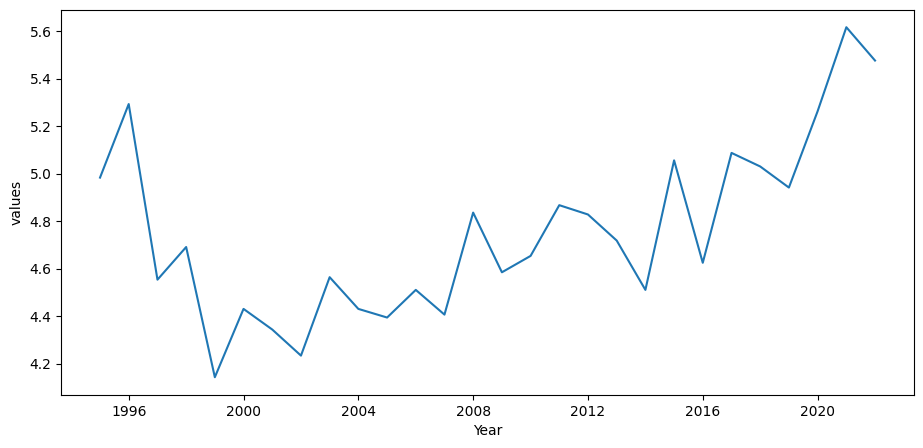

In [235]:
plt.figure(figsize=(11,5))
fig = plt.figure(1)
inf_female_log = np.log(inf_female)
plt.plot(inf_female_log)
plt.xlabel('Year')
plt.ylabel('values')
plt.show()

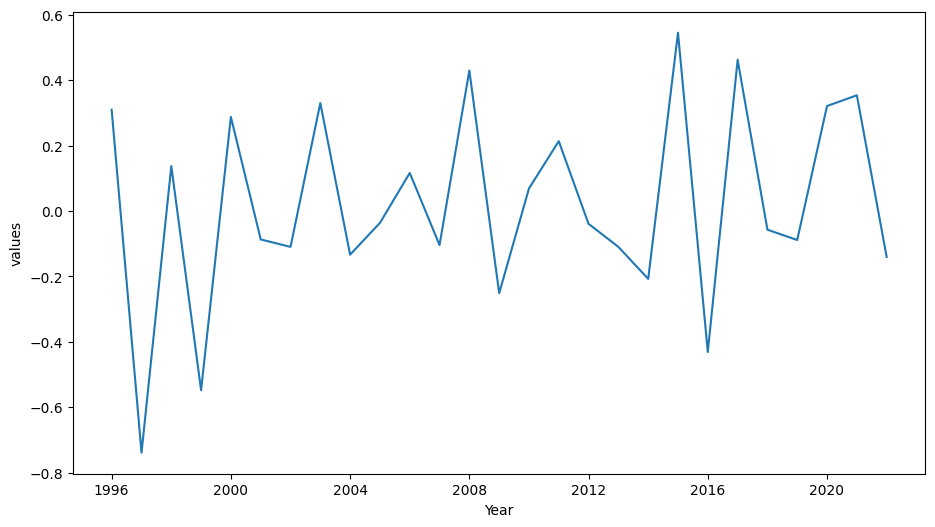

In [236]:
plt.figure(figsize=(11,6))
fig = plt.figure(1)

inf_female_log_diff = inf_female_log - inf_female_log.shift()
plt.plot(inf_female_log_diff)
plt.xlabel('Year')
plt.ylabel('values')
plt.show()

In [237]:
inf_female_log_diff.dropna(inplace=True)

In [238]:
sta_test2 = adfuller(inf_female_log_diff)
print("adf statistic : ",sta_test2[0])
print("p value : ",sta_test2[1])
print("critical values : ",sta_test2[4])

adf statistic :  -4.277023179862108
p value :  0.000486718097867656
critical values :  {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}


In [239]:
log_acf = acf(inf_female_log_diff,nlags=8)
log_pacf = pacf(inf_female_log_diff,nlags=8)

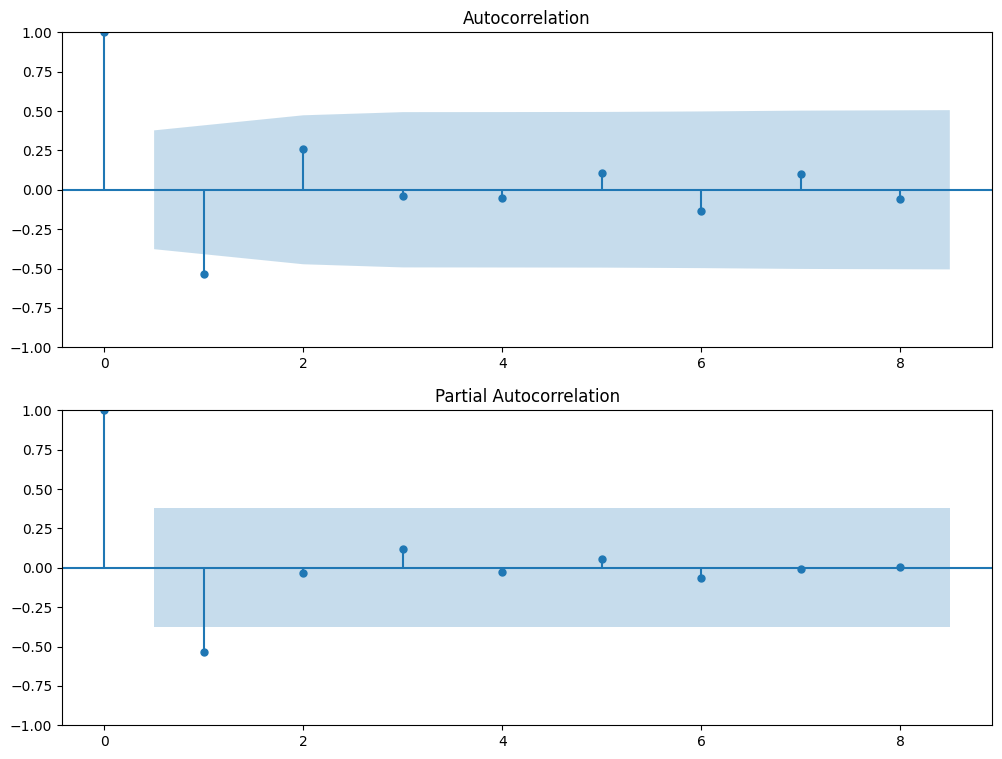

In [240]:
# selecting the ar and ma terms

import statsmodels.api as sm

fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(inf_female_log_diff.dropna(),lags=8,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(inf_female_log_diff.dropna(),lags=8,ax=ax2)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


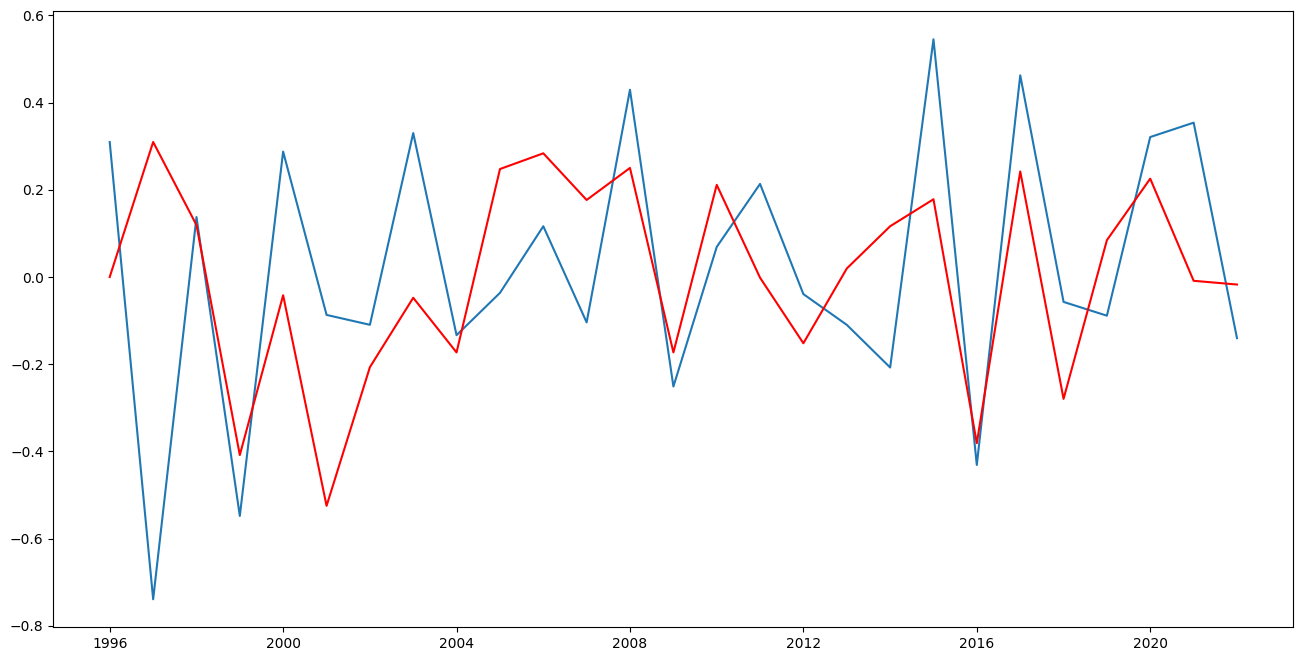

In [241]:
plt.figure(figsize=(16,8))
model = ARIMA(inf_female_log_diff,order=(2,1,2))
results_arima = model.fit()
plt.plot(inf_female_log_diff)
plt.plot(results_arima.fittedvalues,color='red')

In [242]:
arimamodel(inf_female_log)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=11.396, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=43.890, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=21.386, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=11.827, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=11.453, Time=0.10 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=13.092, Time=0.05 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0]          
Total fit time: 0.993 seconds


ARIMA(order=(1, 2, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


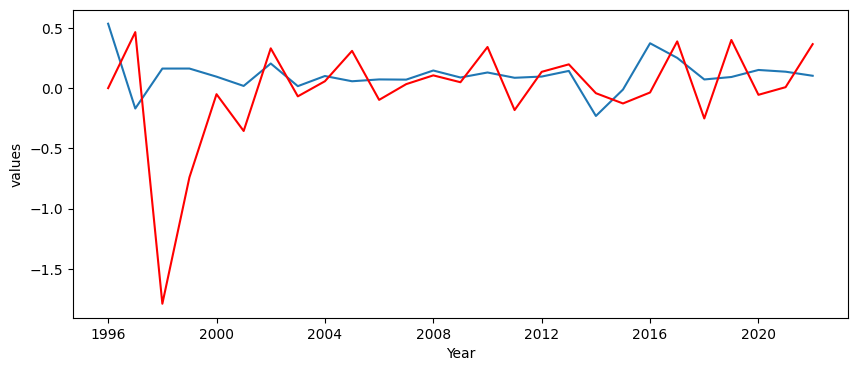

In [243]:
plt.figure(figsize=(10,4))
model = ARIMA(inf_female_log_diff,order=(1,2,1))
results_arima = model.fit()
plt.plot(inf_male_log_diff)
plt.plot(results_arima.fittedvalues,color='red')
plt.xlabel('Year')
plt.ylabel('values')
plt.show()

In [244]:
print(results_arima.summary())

                               SARIMAX Results                                
Dep. Variable:               A_female   No. Observations:                   27
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 -11.048
Date:                Mon, 05 Aug 2024   AIC                             28.096
Time:                        15:50:24   BIC                             31.752
Sample:                    01-01-1996   HQIC                            29.110
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8217      0.130     -6.325      0.000      -1.076      -0.567
ma.L1         -0.9994     54.952     -0.018      0.985    -108.703     106.704
sigma2         0.1136      6.259      0.018      0.9

In [245]:
# Get the forecast, lower, and upper interval
final_results = results_arima.get_forecast(steps=10, alpha=0.05).summary_frame()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [246]:
final_results

A_female        mean   mean_se  mean_ci_lower  mean_ci_upper
2023-01-01  0.283784  0.343540      -0.389541       0.957109
2024-01-01 -0.046809  0.351263      -0.735272       0.641655
2025-01-01  0.242698  0.467385      -0.673360       1.158756
2026-01-01  0.022689  0.484222      -0.926369       0.971748
2027-01-01  0.221332  0.563533      -0.883173       1.325836
2028-01-01  0.075983  0.587552      -1.075598       1.227565
2029-01-01  0.213281  0.650075      -1.060843       1.487404
2030-01-01  0.118337  0.679158      -1.212788       1.449463
2031-01-01  0.214218  0.732576      -1.221605       1.650042
2032-01-01  0.153305  0.765039      -1.346143       1.652753

In [247]:
# Get the last observed value from log-transformed data
last_log_value = inf_female_log.iloc[-1]

In [248]:
last_log_value

A_female    5.476464
Name: 2022-01-01 00:00:00, dtype: float64

In [249]:
# Reverse differencing
inffe_forecasted_diff = final_results.copy()

inffe_forecasted_diff

A_female        mean   mean_se  mean_ci_lower  mean_ci_upper
2023-01-01  0.283784  0.343540      -0.389541       0.957109
2024-01-01 -0.046809  0.351263      -0.735272       0.641655
2025-01-01  0.242698  0.467385      -0.673360       1.158756
2026-01-01  0.022689  0.484222      -0.926369       0.971748
2027-01-01  0.221332  0.563533      -0.883173       1.325836
2028-01-01  0.075983  0.587552      -1.075598       1.227565
2029-01-01  0.213281  0.650075      -1.060843       1.487404
2030-01-01  0.118337  0.679158      -1.212788       1.449463
2031-01-01  0.214218  0.732576      -1.221605       1.650042
2032-01-01  0.153305  0.765039      -1.346143       1.652753

In [250]:
inffe_forecasted_diff.iloc[:,0:] +=5.476464
inffe_forecasted_diff

A_female        mean   mean_se  mean_ci_lower  mean_ci_upper
2023-01-01  5.760248  5.820004       5.086923       6.433573
2024-01-01  5.429655  5.827727       4.741192       6.118119
2025-01-01  5.719162  5.943849       4.803104       6.635220
2026-01-01  5.499153  5.960686       4.550095       6.448212
2027-01-01  5.697796  6.039997       4.593291       6.802300
2028-01-01  5.552447  6.064016       4.400866       6.704029
2029-01-01  5.689745  6.126539       4.415621       6.963868
2030-01-01  5.594801  6.155622       4.263676       6.925927
2031-01-01  5.690682  6.209040       4.254859       7.126506
2032-01-01  5.629769  6.241503       4.130321       7.129217

In [251]:
# Exponentiate to reverse log transformation
inffe_forecasted_exp = np.exp(inffe_forecasted_diff)
inffe_forecasted_exp

A_female          mean     mean_se  mean_ci_lower  mean_ci_upper
2023-01-01  317.427062  336.973263     161.890931     622.393972
2024-01-01  228.070656  339.586017     114.570700     454.009830
2025-01-01  304.649377  381.400163     121.888114     761.446212
2026-01-01  244.484856  387.876260      94.641395     631.571891
2027-01-01  298.209398  419.891783      98.819158     899.915019
2028-01-01  257.867850  430.099454      81.521400     815.685548
2029-01-01  295.818058  457.848751      82.733221    1057.716874
2030-01-01  269.024165  471.360023      71.070734    1018.337613
2031-01-01  296.095558  497.223863      70.446881    1244.520387
2032-01-01  278.597824  513.629695      62.197898    1247.899845

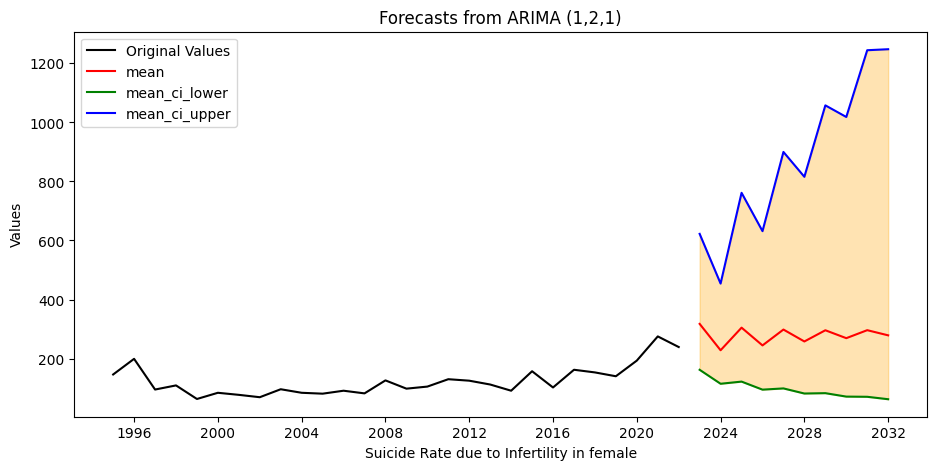

In [252]:
plt.figure(figsize=(11,5))
plt.plot(inf_female['A_female'],color='black')
plt.plot(inffe_forecasted_exp['mean'],color='red')
plt.plot(inffe_forecasted_exp['mean_ci_lower'],color='green')
plt.plot(inffe_forecasted_exp['mean_ci_upper'],color='blue')
plt.legend(['Original Values','mean','mean_ci_lower','mean_ci_upper'],loc="best")
plt.fill_between(inffe_forecasted_exp.index,inffe_forecasted_exp['mean_ci_lower'],inffe_forecasted_exp['mean_ci_upper'],color='orange',alpha=0.3)
plt.xlabel('Suicide Rate due to Infertility in female')
plt.ylabel('Values')
plt.title('Forecasts from ARIMA (1,2,1)')
plt.show()

# ================================================================================================

In [253]:
import geopandas as gpd

In [254]:
india_heatmap = pd.read_excel('/kaggle/input/statewise-suicide-2022/india_heatmap.xlsx')

In [255]:
india_heatmap.head()

state_name  suicides
0     ANDHRA PRADESH      8908
1  ARUNACHAL PRADESH       149
2              ASSAM      3320
3              BIHAR       702
4       CHHATTISGARH      8446